In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd

import torchvision
from torchvision.datasets import MNIST
from torchvision import transforms
import torchvision.utils as vutils
import torch.utils.data as data

if torch.cuda.is_available():
    device = torch.device('cuda')
    dtype = torch.cuda.FloatTensor
else:
    device = torch.device('cpu')
    dtype = torch.FloatTensor


from mmd import _mix_rq_kernel, _mix_rbf_kernel, _distance_kernel, mmd2
from architecture import Generator_Moon
print(device)

cuda


In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

X, y = make_moons(n_samples=500, noise=0.1, random_state=42)
# X = torch.from_numpy(X[y==0]).float().to(device)
X = torch.from_numpy(X).float().to(device)
y = X
y.shape

torch.Size([500, 2])

In [3]:
n_in = 10 # Input noise dimension
d = int(y.shape[1]) # Output space dimension
b = int(y.shape[0])
iter_display = 2000
loss_display = 100

lr = 0.005   # learning rate for generator
n_epochs = 40000

[0/40000] 	Loss_G: 0.0834


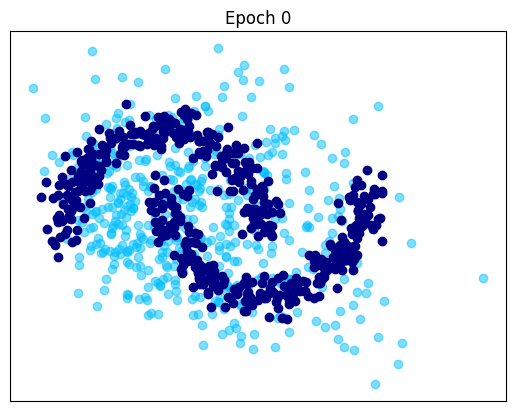

[100/40000] 	Loss_G: 0.0066
[200/40000] 	Loss_G: 0.0016
[300/40000] 	Loss_G: 0.0020
[400/40000] 	Loss_G: 0.0003
[500/40000] 	Loss_G: 0.0058
[600/40000] 	Loss_G: -0.0012
[700/40000] 	Loss_G: 0.0012
[800/40000] 	Loss_G: 0.0025
[900/40000] 	Loss_G: -0.0007
[1000/40000] 	Loss_G: -0.0005
[1100/40000] 	Loss_G: 0.0026
[1200/40000] 	Loss_G: -0.0003
[1300/40000] 	Loss_G: -0.0006
[1400/40000] 	Loss_G: -0.0010
[1500/40000] 	Loss_G: -0.0021
[1600/40000] 	Loss_G: 0.0003
[1700/40000] 	Loss_G: -0.0028
[1800/40000] 	Loss_G: 0.0006
[1900/40000] 	Loss_G: -0.0014
[2000/40000] 	Loss_G: -0.0005


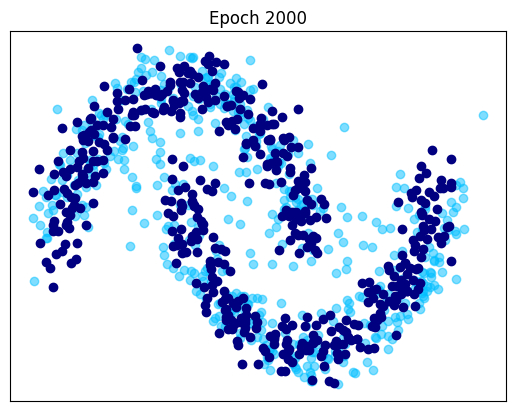

[2100/40000] 	Loss_G: -0.0023
[2200/40000] 	Loss_G: 0.0010
[2300/40000] 	Loss_G: -0.0017
[2400/40000] 	Loss_G: 0.0030
[2500/40000] 	Loss_G: 0.0024
[2600/40000] 	Loss_G: -0.0013
[2700/40000] 	Loss_G: 0.0003
[2800/40000] 	Loss_G: 0.0014
[2900/40000] 	Loss_G: -0.0016
[3000/40000] 	Loss_G: -0.0007
[3100/40000] 	Loss_G: 0.0059
[3200/40000] 	Loss_G: -0.0024
[3300/40000] 	Loss_G: 0.0037
[3400/40000] 	Loss_G: -0.0006
[3500/40000] 	Loss_G: -0.0029
[3600/40000] 	Loss_G: -0.0017
[3700/40000] 	Loss_G: -0.0033
[3800/40000] 	Loss_G: -0.0011
[3900/40000] 	Loss_G: -0.0023
[4000/40000] 	Loss_G: -0.0005


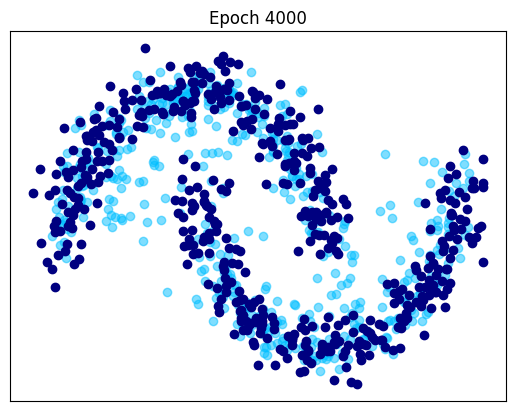

[4100/40000] 	Loss_G: -0.0020
[4200/40000] 	Loss_G: -0.0015
[4300/40000] 	Loss_G: -0.0021
[4400/40000] 	Loss_G: -0.0015
[4500/40000] 	Loss_G: -0.0005
[4600/40000] 	Loss_G: -0.0025
[4700/40000] 	Loss_G: -0.0000
[4800/40000] 	Loss_G: -0.0017
[4900/40000] 	Loss_G: 0.0023
[5000/40000] 	Loss_G: 0.0048
[5100/40000] 	Loss_G: -0.0021
[5200/40000] 	Loss_G: -0.0002
[5300/40000] 	Loss_G: -0.0024
[5400/40000] 	Loss_G: -0.0029
[5500/40000] 	Loss_G: -0.0022
[5600/40000] 	Loss_G: -0.0023
[5700/40000] 	Loss_G: -0.0029
[5800/40000] 	Loss_G: -0.0026
[5900/40000] 	Loss_G: -0.0008
[6000/40000] 	Loss_G: -0.0033


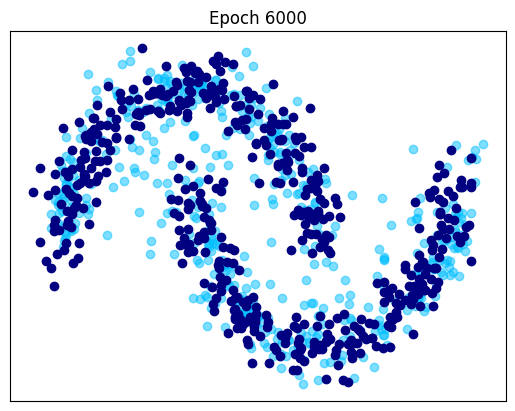

[6100/40000] 	Loss_G: 0.0003
[6200/40000] 	Loss_G: -0.0025
[6300/40000] 	Loss_G: -0.0020
[6400/40000] 	Loss_G: -0.0019
[6500/40000] 	Loss_G: 0.0001
[6600/40000] 	Loss_G: -0.0025
[6700/40000] 	Loss_G: -0.0025
[6800/40000] 	Loss_G: -0.0005
[6900/40000] 	Loss_G: 0.0023
[7000/40000] 	Loss_G: -0.0018
[7100/40000] 	Loss_G: -0.0018
[7200/40000] 	Loss_G: 0.0004
[7300/40000] 	Loss_G: -0.0011
[7400/40000] 	Loss_G: -0.0000
[7500/40000] 	Loss_G: 0.0016
[7600/40000] 	Loss_G: 0.0059
[7700/40000] 	Loss_G: -0.0016
[7800/40000] 	Loss_G: -0.0016
[7900/40000] 	Loss_G: 0.0001
[8000/40000] 	Loss_G: -0.0032


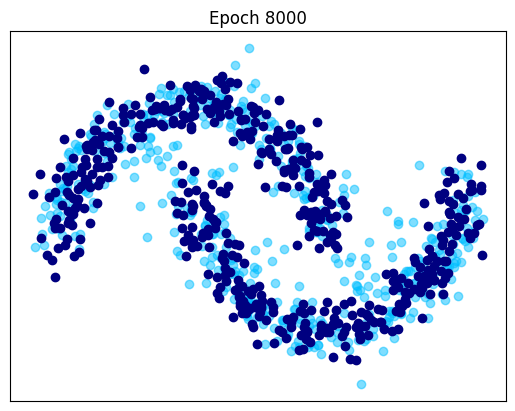

[8100/40000] 	Loss_G: -0.0020
[8200/40000] 	Loss_G: 0.0040
[8300/40000] 	Loss_G: -0.0018
[8400/40000] 	Loss_G: 0.0025
[8500/40000] 	Loss_G: -0.0029
[8600/40000] 	Loss_G: -0.0030
[8700/40000] 	Loss_G: -0.0032
[8800/40000] 	Loss_G: -0.0017
[8900/40000] 	Loss_G: 0.0021
[9000/40000] 	Loss_G: -0.0028
[9100/40000] 	Loss_G: -0.0015
[9200/40000] 	Loss_G: -0.0033
[9300/40000] 	Loss_G: -0.0029
[9400/40000] 	Loss_G: 0.0003
[9500/40000] 	Loss_G: -0.0023
[9600/40000] 	Loss_G: -0.0013
[9700/40000] 	Loss_G: -0.0020
[9800/40000] 	Loss_G: -0.0022
[9900/40000] 	Loss_G: -0.0021
[10000/40000] 	Loss_G: -0.0034


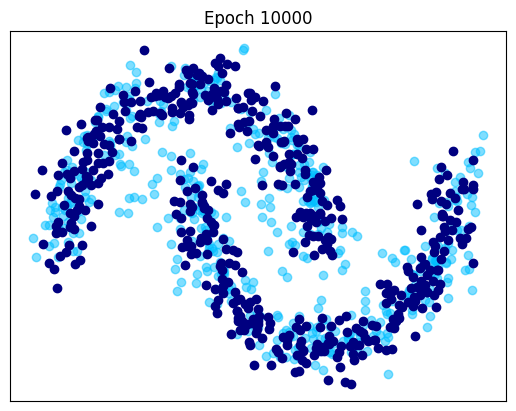

[10100/40000] 	Loss_G: -0.0014
[10200/40000] 	Loss_G: -0.0034
[10300/40000] 	Loss_G: -0.0025
[10400/40000] 	Loss_G: -0.0026
[10500/40000] 	Loss_G: -0.0024
[10600/40000] 	Loss_G: -0.0028
[10700/40000] 	Loss_G: -0.0025
[10800/40000] 	Loss_G: -0.0025
[10900/40000] 	Loss_G: -0.0037
[11000/40000] 	Loss_G: -0.0033
[11100/40000] 	Loss_G: 0.0016
[11200/40000] 	Loss_G: -0.0039
[11300/40000] 	Loss_G: -0.0023
[11400/40000] 	Loss_G: -0.0028
[11500/40000] 	Loss_G: -0.0020
[11600/40000] 	Loss_G: -0.0024
[11700/40000] 	Loss_G: -0.0014
[11800/40000] 	Loss_G: 0.0001
[11900/40000] 	Loss_G: -0.0035
[12000/40000] 	Loss_G: -0.0020


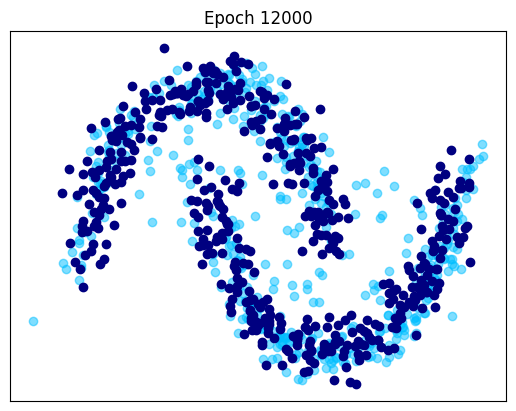

[12100/40000] 	Loss_G: -0.0024
[12200/40000] 	Loss_G: 0.0006
[12300/40000] 	Loss_G: -0.0017
[12400/40000] 	Loss_G: -0.0022
[12500/40000] 	Loss_G: -0.0015
[12600/40000] 	Loss_G: -0.0029
[12700/40000] 	Loss_G: 0.0011
[12800/40000] 	Loss_G: -0.0012
[12900/40000] 	Loss_G: -0.0003
[13000/40000] 	Loss_G: -0.0014
[13100/40000] 	Loss_G: 0.0008
[13200/40000] 	Loss_G: -0.0034
[13300/40000] 	Loss_G: -0.0005
[13400/40000] 	Loss_G: 0.0019
[13500/40000] 	Loss_G: -0.0025
[13600/40000] 	Loss_G: -0.0038
[13700/40000] 	Loss_G: 0.0007
[13800/40000] 	Loss_G: -0.0032
[13900/40000] 	Loss_G: -0.0012
[14000/40000] 	Loss_G: 0.0000


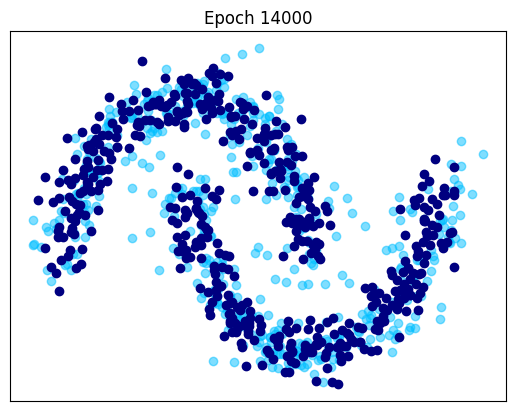

[14100/40000] 	Loss_G: 0.0041
[14200/40000] 	Loss_G: -0.0007
[14300/40000] 	Loss_G: -0.0032
[14400/40000] 	Loss_G: -0.0012
[14500/40000] 	Loss_G: -0.0025
[14600/40000] 	Loss_G: 0.0032
[14700/40000] 	Loss_G: -0.0025
[14800/40000] 	Loss_G: -0.0006
[14900/40000] 	Loss_G: -0.0023
[15000/40000] 	Loss_G: -0.0003
[15100/40000] 	Loss_G: -0.0033
[15200/40000] 	Loss_G: -0.0011
[15300/40000] 	Loss_G: -0.0027
[15400/40000] 	Loss_G: -0.0008
[15500/40000] 	Loss_G: -0.0019
[15600/40000] 	Loss_G: -0.0005
[15700/40000] 	Loss_G: -0.0024
[15800/40000] 	Loss_G: -0.0014
[15900/40000] 	Loss_G: -0.0024
[16000/40000] 	Loss_G: -0.0025


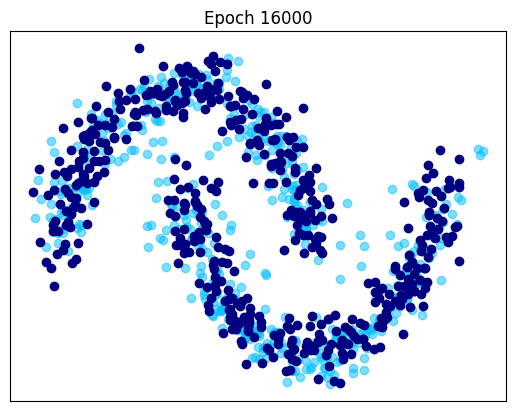

[16100/40000] 	Loss_G: 0.0026
[16200/40000] 	Loss_G: -0.0008
[16300/40000] 	Loss_G: 0.0003
[16400/40000] 	Loss_G: 0.0089
[16500/40000] 	Loss_G: -0.0024
[16600/40000] 	Loss_G: -0.0021
[16700/40000] 	Loss_G: -0.0024
[16800/40000] 	Loss_G: -0.0029
[16900/40000] 	Loss_G: -0.0029
[17000/40000] 	Loss_G: -0.0032
[17100/40000] 	Loss_G: -0.0020
[17200/40000] 	Loss_G: 0.0001
[17300/40000] 	Loss_G: -0.0020
[17400/40000] 	Loss_G: -0.0013
[17500/40000] 	Loss_G: 0.0042
[17600/40000] 	Loss_G: -0.0026
[17700/40000] 	Loss_G: -0.0016
[17800/40000] 	Loss_G: -0.0009
[17900/40000] 	Loss_G: -0.0028
[18000/40000] 	Loss_G: 0.0009


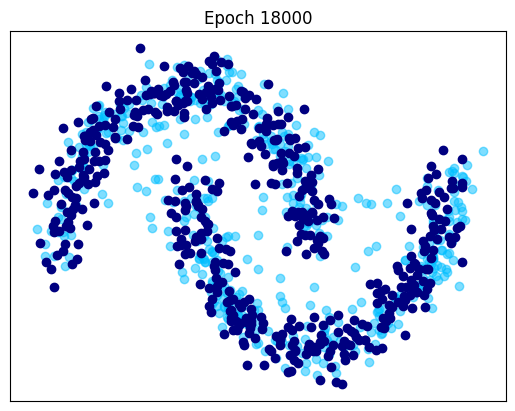

[18100/40000] 	Loss_G: 0.0012
[18200/40000] 	Loss_G: -0.0026
[18300/40000] 	Loss_G: -0.0023
[18400/40000] 	Loss_G: -0.0017
[18500/40000] 	Loss_G: -0.0022
[18600/40000] 	Loss_G: 0.0032
[18700/40000] 	Loss_G: -0.0019
[18800/40000] 	Loss_G: -0.0014
[18900/40000] 	Loss_G: -0.0016
[19000/40000] 	Loss_G: -0.0013
[19100/40000] 	Loss_G: -0.0028
[19200/40000] 	Loss_G: -0.0016
[19300/40000] 	Loss_G: -0.0035
[19400/40000] 	Loss_G: -0.0038
[19500/40000] 	Loss_G: -0.0015
[19600/40000] 	Loss_G: -0.0025
[19700/40000] 	Loss_G: -0.0000
[19800/40000] 	Loss_G: -0.0009
[19900/40000] 	Loss_G: -0.0014
[20000/40000] 	Loss_G: -0.0028


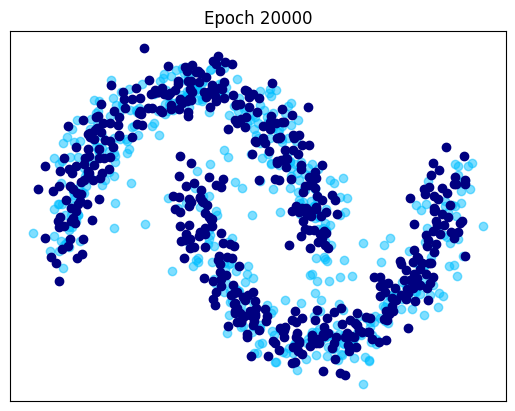

[20100/40000] 	Loss_G: -0.0010
[20200/40000] 	Loss_G: -0.0032
[20300/40000] 	Loss_G: -0.0025
[20400/40000] 	Loss_G: -0.0024
[20500/40000] 	Loss_G: -0.0001
[20600/40000] 	Loss_G: -0.0037
[20700/40000] 	Loss_G: 0.0024
[20800/40000] 	Loss_G: 0.0017
[20900/40000] 	Loss_G: -0.0031
[21000/40000] 	Loss_G: -0.0009
[21100/40000] 	Loss_G: -0.0023
[21200/40000] 	Loss_G: 0.0053
[21300/40000] 	Loss_G: 0.0076
[21400/40000] 	Loss_G: -0.0019
[21500/40000] 	Loss_G: -0.0020
[21600/40000] 	Loss_G: -0.0005
[21700/40000] 	Loss_G: -0.0010
[21800/40000] 	Loss_G: -0.0003
[21900/40000] 	Loss_G: -0.0007
[22000/40000] 	Loss_G: -0.0032


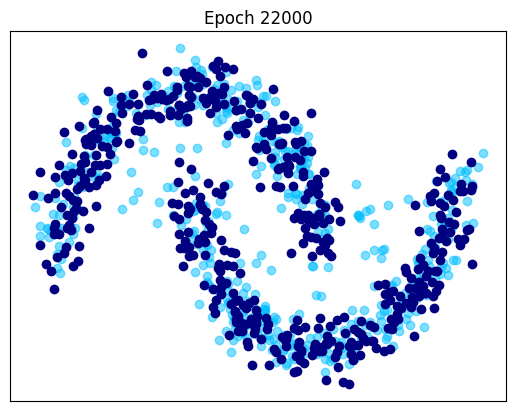

[22100/40000] 	Loss_G: -0.0035
[22200/40000] 	Loss_G: -0.0032
[22300/40000] 	Loss_G: -0.0031
[22400/40000] 	Loss_G: -0.0009
[22500/40000] 	Loss_G: -0.0019
[22600/40000] 	Loss_G: -0.0019
[22700/40000] 	Loss_G: -0.0027
[22800/40000] 	Loss_G: -0.0019
[22900/40000] 	Loss_G: -0.0008
[23000/40000] 	Loss_G: -0.0003
[23100/40000] 	Loss_G: -0.0022
[23200/40000] 	Loss_G: -0.0009
[23300/40000] 	Loss_G: -0.0023
[23400/40000] 	Loss_G: 0.0069
[23500/40000] 	Loss_G: -0.0020
[23600/40000] 	Loss_G: 0.0003
[23700/40000] 	Loss_G: -0.0033
[23800/40000] 	Loss_G: -0.0041
[23900/40000] 	Loss_G: -0.0015
[24000/40000] 	Loss_G: -0.0032


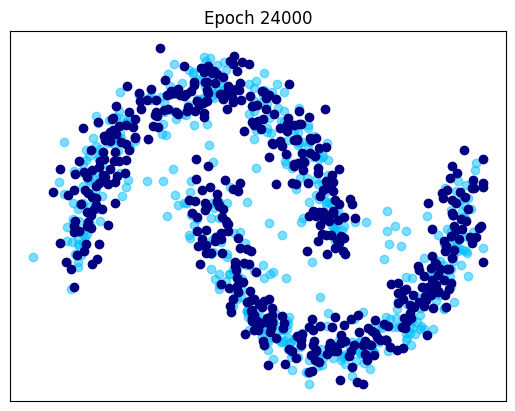

[24100/40000] 	Loss_G: -0.0023
[24200/40000] 	Loss_G: -0.0019
[24300/40000] 	Loss_G: -0.0038
[24400/40000] 	Loss_G: -0.0020
[24500/40000] 	Loss_G: -0.0017
[24600/40000] 	Loss_G: -0.0007
[24700/40000] 	Loss_G: -0.0027
[24800/40000] 	Loss_G: -0.0035
[24900/40000] 	Loss_G: 0.0047
[25000/40000] 	Loss_G: -0.0022
[25100/40000] 	Loss_G: -0.0036
[25200/40000] 	Loss_G: -0.0029
[25300/40000] 	Loss_G: -0.0027
[25400/40000] 	Loss_G: -0.0023
[25500/40000] 	Loss_G: -0.0007
[25600/40000] 	Loss_G: -0.0022
[25700/40000] 	Loss_G: -0.0024
[25800/40000] 	Loss_G: -0.0026
[25900/40000] 	Loss_G: -0.0000
[26000/40000] 	Loss_G: -0.0006


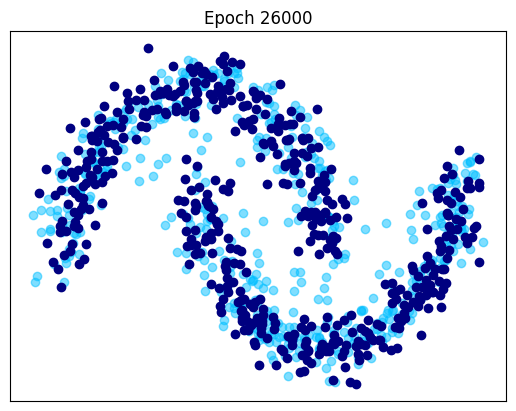

[26100/40000] 	Loss_G: -0.0023
[26200/40000] 	Loss_G: 0.0023
[26300/40000] 	Loss_G: -0.0008
[26400/40000] 	Loss_G: -0.0028
[26500/40000] 	Loss_G: 0.0007
[26600/40000] 	Loss_G: -0.0002
[26700/40000] 	Loss_G: -0.0024
[26800/40000] 	Loss_G: -0.0034
[26900/40000] 	Loss_G: -0.0022
[27000/40000] 	Loss_G: -0.0012
[27100/40000] 	Loss_G: -0.0037
[27200/40000] 	Loss_G: -0.0027
[27300/40000] 	Loss_G: 0.0007
[27400/40000] 	Loss_G: -0.0014
[27500/40000] 	Loss_G: -0.0011
[27600/40000] 	Loss_G: 0.0027
[27700/40000] 	Loss_G: 0.0046
[27800/40000] 	Loss_G: -0.0016
[27900/40000] 	Loss_G: -0.0028
[28000/40000] 	Loss_G: -0.0028


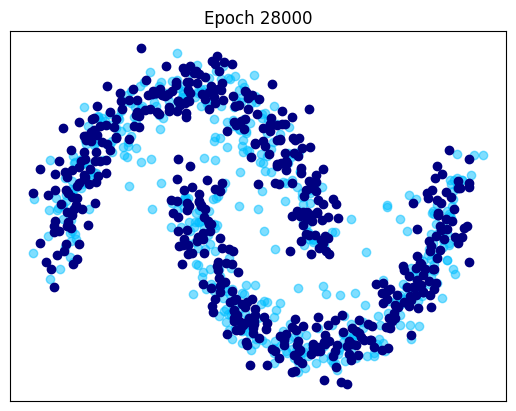

[28100/40000] 	Loss_G: -0.0016
[28200/40000] 	Loss_G: -0.0036
[28300/40000] 	Loss_G: 0.0018
[28400/40000] 	Loss_G: -0.0027
[28500/40000] 	Loss_G: -0.0004
[28600/40000] 	Loss_G: -0.0025
[28700/40000] 	Loss_G: -0.0034
[28800/40000] 	Loss_G: 0.0045
[28900/40000] 	Loss_G: -0.0034
[29000/40000] 	Loss_G: -0.0030
[29100/40000] 	Loss_G: -0.0004
[29200/40000] 	Loss_G: 0.0032
[29300/40000] 	Loss_G: 0.0004
[29400/40000] 	Loss_G: -0.0007
[29500/40000] 	Loss_G: -0.0027
[29600/40000] 	Loss_G: -0.0013
[29700/40000] 	Loss_G: 0.0020
[29800/40000] 	Loss_G: -0.0037
[29900/40000] 	Loss_G: -0.0023
[30000/40000] 	Loss_G: -0.0037


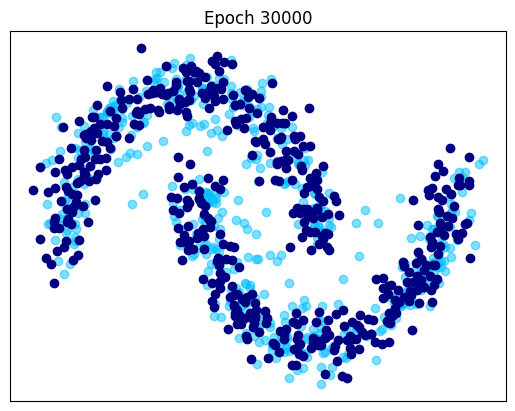

[30100/40000] 	Loss_G: -0.0031
[30200/40000] 	Loss_G: -0.0034
[30300/40000] 	Loss_G: -0.0026
[30400/40000] 	Loss_G: -0.0033
[30500/40000] 	Loss_G: -0.0015
[30600/40000] 	Loss_G: -0.0027
[30700/40000] 	Loss_G: -0.0029
[30800/40000] 	Loss_G: 0.0036
[30900/40000] 	Loss_G: -0.0025
[31000/40000] 	Loss_G: 0.0043
[31100/40000] 	Loss_G: -0.0023
[31200/40000] 	Loss_G: -0.0015
[31300/40000] 	Loss_G: -0.0019
[31400/40000] 	Loss_G: -0.0034
[31500/40000] 	Loss_G: 0.0015
[31600/40000] 	Loss_G: -0.0028
[31700/40000] 	Loss_G: -0.0028
[31800/40000] 	Loss_G: -0.0029
[31900/40000] 	Loss_G: -0.0026
[32000/40000] 	Loss_G: -0.0038


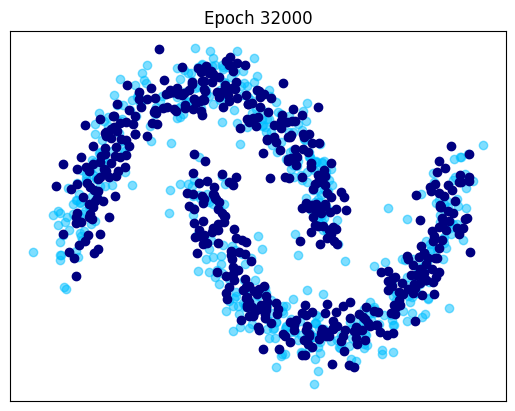

[32100/40000] 	Loss_G: -0.0018
[32200/40000] 	Loss_G: 0.0032
[32300/40000] 	Loss_G: -0.0026
[32400/40000] 	Loss_G: -0.0035
[32500/40000] 	Loss_G: -0.0007
[32600/40000] 	Loss_G: -0.0026
[32700/40000] 	Loss_G: -0.0033
[32800/40000] 	Loss_G: -0.0006
[32900/40000] 	Loss_G: 0.0006
[33000/40000] 	Loss_G: -0.0001
[33100/40000] 	Loss_G: -0.0019
[33200/40000] 	Loss_G: -0.0037
[33300/40000] 	Loss_G: -0.0017
[33400/40000] 	Loss_G: -0.0013
[33500/40000] 	Loss_G: -0.0029
[33600/40000] 	Loss_G: -0.0034
[33700/40000] 	Loss_G: -0.0023
[33800/40000] 	Loss_G: -0.0025
[33900/40000] 	Loss_G: -0.0035
[34000/40000] 	Loss_G: -0.0031


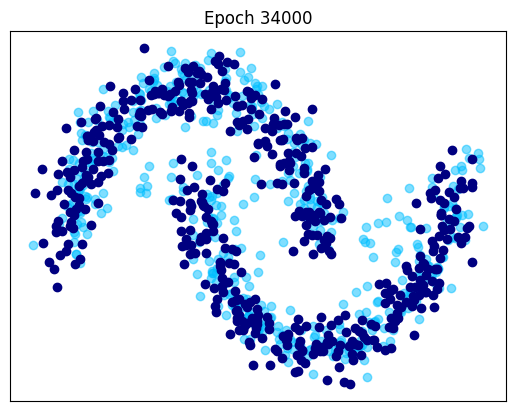

[34100/40000] 	Loss_G: 0.0007
[34200/40000] 	Loss_G: -0.0030
[34300/40000] 	Loss_G: -0.0029
[34400/40000] 	Loss_G: 0.0034
[34500/40000] 	Loss_G: -0.0024
[34600/40000] 	Loss_G: -0.0041
[34700/40000] 	Loss_G: -0.0029
[34800/40000] 	Loss_G: -0.0008
[34900/40000] 	Loss_G: -0.0022
[35000/40000] 	Loss_G: -0.0034
[35100/40000] 	Loss_G: -0.0011
[35200/40000] 	Loss_G: -0.0023
[35300/40000] 	Loss_G: -0.0030
[35400/40000] 	Loss_G: -0.0013
[35500/40000] 	Loss_G: -0.0033
[35600/40000] 	Loss_G: -0.0025
[35700/40000] 	Loss_G: -0.0017
[35800/40000] 	Loss_G: 0.0005
[35900/40000] 	Loss_G: -0.0022
[36000/40000] 	Loss_G: -0.0028


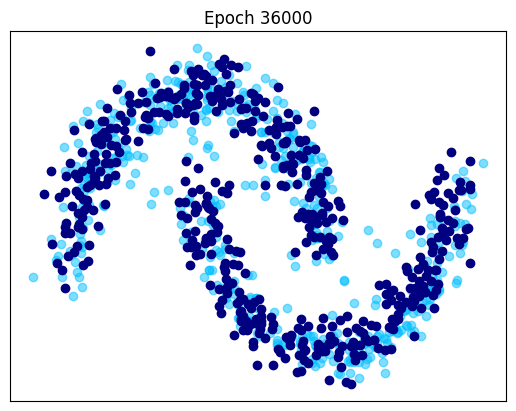

[36100/40000] 	Loss_G: -0.0016
[36200/40000] 	Loss_G: -0.0028
[36300/40000] 	Loss_G: -0.0024
[36400/40000] 	Loss_G: -0.0033
[36500/40000] 	Loss_G: -0.0036
[36600/40000] 	Loss_G: -0.0031
[36700/40000] 	Loss_G: -0.0033
[36800/40000] 	Loss_G: 0.0008
[36900/40000] 	Loss_G: -0.0003
[37000/40000] 	Loss_G: -0.0004
[37100/40000] 	Loss_G: -0.0025
[37200/40000] 	Loss_G: -0.0023
[37300/40000] 	Loss_G: -0.0040
[37400/40000] 	Loss_G: -0.0035
[37500/40000] 	Loss_G: -0.0007
[37600/40000] 	Loss_G: -0.0029
[37700/40000] 	Loss_G: 0.0021
[37800/40000] 	Loss_G: -0.0038
[37900/40000] 	Loss_G: -0.0004
[38000/40000] 	Loss_G: 0.0020


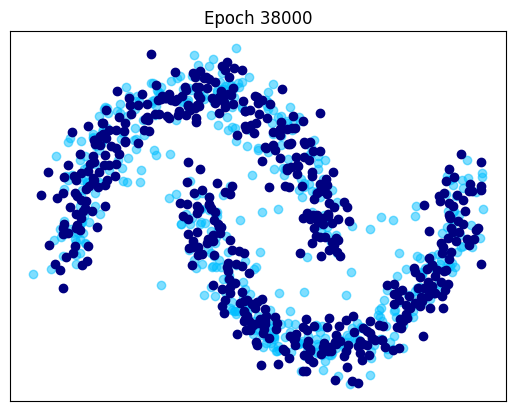

[38100/40000] 	Loss_G: -0.0010
[38200/40000] 	Loss_G: -0.0026
[38300/40000] 	Loss_G: -0.0020
[38400/40000] 	Loss_G: 0.0024
[38500/40000] 	Loss_G: -0.0017
[38600/40000] 	Loss_G: -0.0040
[38700/40000] 	Loss_G: -0.0008
[38800/40000] 	Loss_G: -0.0029
[38900/40000] 	Loss_G: -0.0022
[39000/40000] 	Loss_G: -0.0020
[39100/40000] 	Loss_G: -0.0034
[39200/40000] 	Loss_G: -0.0017
[39300/40000] 	Loss_G: 0.0080
[39400/40000] 	Loss_G: -0.0025
[39500/40000] 	Loss_G: -0.0035
[39600/40000] 	Loss_G: -0.0040
[39700/40000] 	Loss_G: -0.0028
[39800/40000] 	Loss_G: -0.0009
[39900/40000] 	Loss_G: -0.0027


In [4]:
# Main loop
torch.manual_seed(1)  # initialize random seed for reproducibility

# Initialize generators and discriminators
G = Generator_Moon(n_in=n_in, n_out=d, n_hid=10, nlayers=3, device=device)
kernel = _distance_kernel

optimG = optim.Adam(G.parameters(), lr=lr)

Glosses = []

for epoch in range(n_epochs):

    Gloss = torch.tensor(0.0, device=device)

    z = torch.randn(b, n_in, device=device)
    x = G(z)
    optimG.zero_grad()
    Gloss = mmd2(kernel, x, y)
    Gloss.backward()
    optimG.step()

    # Output training stats
    if (epoch % loss_display == 0):
        print('[%d/%d] \tLoss_G: %.4f'
          % (epoch, n_epochs, Gloss.item()))
        Glosses.append(Gloss.item())


    if(epoch % iter_display == 0):
        z = torch.randn(b, n_in, device=device)
        x = G(z)
        xd = x.detach()
        strtitle = 'Epoch '+str(epoch)
        fig = plt.figure(dpi=100)
        plt.xticks([])
        plt.yticks([])
        plt.scatter(xd[:, 0].cpu(), xd[:,1].cpu(),c='deepskyblue',alpha=.5)
        plt.scatter(y[:, 0].cpu(), y[:,1].cpu(),c='navy')
        plt.title(strtitle)
        plt.show()

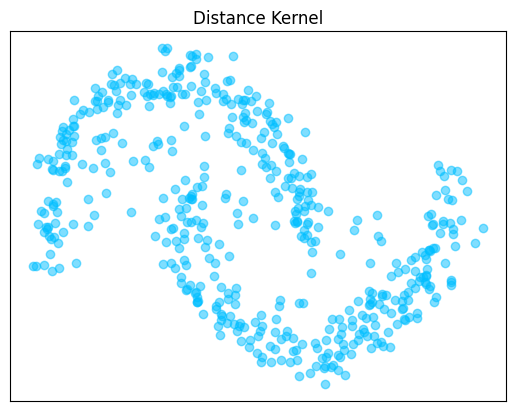

In [5]:
z = torch.randn(b, n_in, device=device)
x = G(z)
xd = x.detach()
strtitle = 'Epoch '+str(epoch)
fig = plt.figure(dpi=100)
plt.xticks([])
plt.yticks([])
plt.scatter(xd[:, 0].cpu(), xd[:,1].cpu(),c='deepskyblue',alpha=.5)
plt.title("Distance Kernel")
plt.show()

In [15]:
n_in = 10 # Input noise dimension
d = int(y.shape[1]) # Output space dimension
b = int(y.shape[0])
iter_display = 2000
loss_display = 100

lr = 1e-2  # learning rate for generator
n_epochs = 40000

[0/40000] 	Loss_G: 0.0210


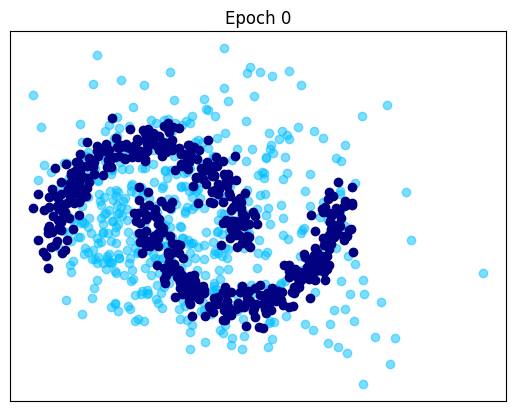

[100/40000] 	Loss_G: 0.0008
[200/40000] 	Loss_G: -0.0008
[300/40000] 	Loss_G: -0.0004
[400/40000] 	Loss_G: -0.0007
[500/40000] 	Loss_G: 0.0005
[600/40000] 	Loss_G: -0.0008
[700/40000] 	Loss_G: 0.0012
[800/40000] 	Loss_G: -0.0002
[900/40000] 	Loss_G: -0.0004
[1000/40000] 	Loss_G: -0.0006
[1100/40000] 	Loss_G: -0.0005
[1200/40000] 	Loss_G: -0.0007
[1300/40000] 	Loss_G: -0.0003
[1400/40000] 	Loss_G: -0.0003
[1500/40000] 	Loss_G: -0.0002
[1600/40000] 	Loss_G: 0.0010
[1700/40000] 	Loss_G: -0.0006
[1800/40000] 	Loss_G: -0.0005
[1900/40000] 	Loss_G: -0.0009
[2000/40000] 	Loss_G: -0.0006


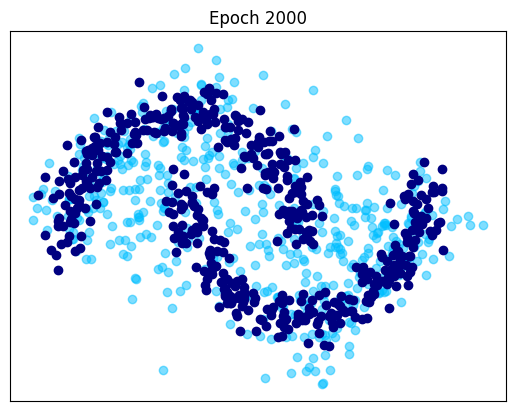

[2100/40000] 	Loss_G: -0.0003
[2200/40000] 	Loss_G: 0.0007
[2300/40000] 	Loss_G: -0.0006
[2400/40000] 	Loss_G: 0.0012
[2500/40000] 	Loss_G: -0.0004
[2600/40000] 	Loss_G: -0.0002
[2700/40000] 	Loss_G: -0.0007
[2800/40000] 	Loss_G: -0.0005
[2900/40000] 	Loss_G: 0.0006
[3000/40000] 	Loss_G: 0.0012
[3100/40000] 	Loss_G: 0.0021
[3200/40000] 	Loss_G: -0.0008
[3300/40000] 	Loss_G: -0.0005
[3400/40000] 	Loss_G: -0.0007
[3500/40000] 	Loss_G: -0.0002
[3600/40000] 	Loss_G: 0.0002
[3700/40000] 	Loss_G: 0.0009
[3800/40000] 	Loss_G: -0.0005
[3900/40000] 	Loss_G: -0.0000
[4000/40000] 	Loss_G: 0.0006


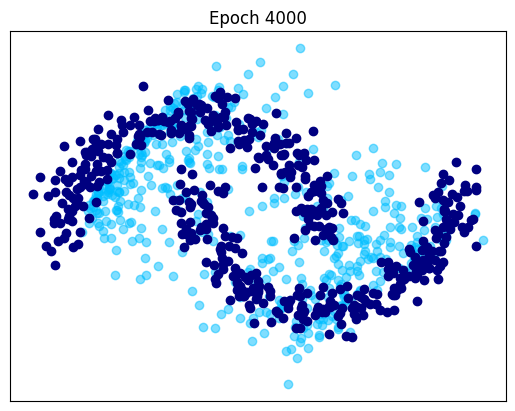

[4100/40000] 	Loss_G: -0.0005
[4200/40000] 	Loss_G: -0.0005
[4300/40000] 	Loss_G: -0.0005
[4400/40000] 	Loss_G: -0.0007
[4500/40000] 	Loss_G: -0.0005
[4600/40000] 	Loss_G: -0.0010
[4700/40000] 	Loss_G: 0.0054
[4800/40000] 	Loss_G: -0.0006
[4900/40000] 	Loss_G: -0.0006
[5000/40000] 	Loss_G: 0.0006
[5100/40000] 	Loss_G: -0.0002
[5200/40000] 	Loss_G: -0.0004
[5300/40000] 	Loss_G: -0.0008
[5400/40000] 	Loss_G: -0.0008
[5500/40000] 	Loss_G: -0.0002
[5600/40000] 	Loss_G: -0.0007
[5700/40000] 	Loss_G: -0.0009
[5800/40000] 	Loss_G: -0.0004
[5900/40000] 	Loss_G: -0.0000
[6000/40000] 	Loss_G: 0.0001


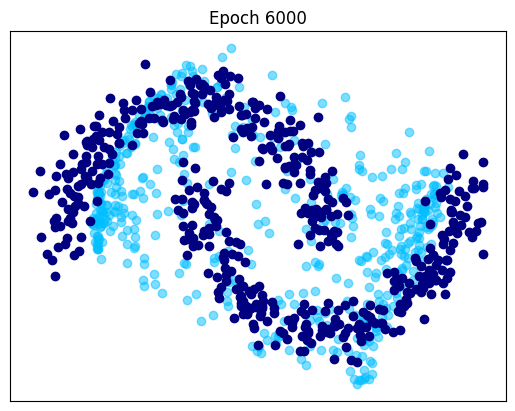

[6100/40000] 	Loss_G: -0.0002
[6200/40000] 	Loss_G: -0.0007
[6300/40000] 	Loss_G: 0.0004
[6400/40000] 	Loss_G: -0.0004
[6500/40000] 	Loss_G: -0.0008
[6600/40000] 	Loss_G: 0.0004
[6700/40000] 	Loss_G: -0.0006
[6800/40000] 	Loss_G: 0.0000
[6900/40000] 	Loss_G: 0.0009
[7000/40000] 	Loss_G: -0.0008
[7100/40000] 	Loss_G: -0.0008
[7200/40000] 	Loss_G: -0.0008
[7300/40000] 	Loss_G: 0.0003
[7400/40000] 	Loss_G: 0.0000
[7500/40000] 	Loss_G: 0.0016
[7600/40000] 	Loss_G: -0.0000
[7700/40000] 	Loss_G: 0.0023
[7800/40000] 	Loss_G: -0.0006
[7900/40000] 	Loss_G: -0.0005
[8000/40000] 	Loss_G: -0.0009


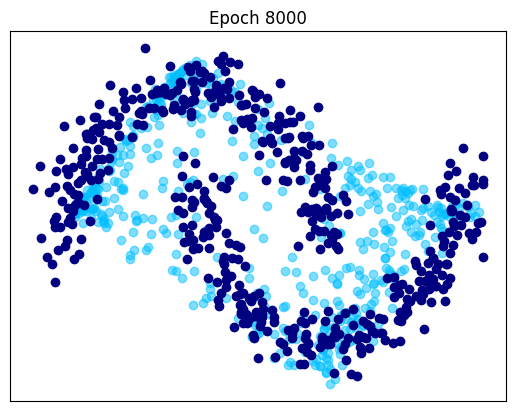

[8100/40000] 	Loss_G: -0.0007
[8200/40000] 	Loss_G: 0.0037
[8300/40000] 	Loss_G: -0.0009
[8400/40000] 	Loss_G: -0.0007
[8500/40000] 	Loss_G: -0.0004
[8600/40000] 	Loss_G: 0.0001
[8700/40000] 	Loss_G: -0.0009
[8800/40000] 	Loss_G: -0.0002
[8900/40000] 	Loss_G: -0.0001
[9000/40000] 	Loss_G: -0.0009
[9100/40000] 	Loss_G: -0.0004
[9200/40000] 	Loss_G: -0.0008
[9300/40000] 	Loss_G: -0.0007
[9400/40000] 	Loss_G: -0.0003
[9500/40000] 	Loss_G: -0.0010
[9600/40000] 	Loss_G: -0.0003
[9700/40000] 	Loss_G: -0.0007
[9800/40000] 	Loss_G: -0.0007
[9900/40000] 	Loss_G: -0.0003
[10000/40000] 	Loss_G: -0.0009


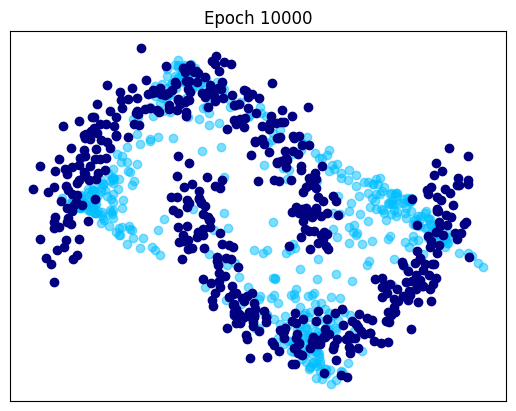

[10100/40000] 	Loss_G: -0.0001
[10200/40000] 	Loss_G: -0.0009
[10300/40000] 	Loss_G: -0.0007
[10400/40000] 	Loss_G: -0.0003
[10500/40000] 	Loss_G: -0.0004
[10600/40000] 	Loss_G: -0.0008
[10700/40000] 	Loss_G: -0.0009
[10800/40000] 	Loss_G: 0.0003
[10900/40000] 	Loss_G: 0.0001
[11000/40000] 	Loss_G: -0.0009
[11100/40000] 	Loss_G: 0.0026
[11200/40000] 	Loss_G: -0.0005
[11300/40000] 	Loss_G: -0.0001
[11400/40000] 	Loss_G: 0.0005
[11500/40000] 	Loss_G: -0.0008
[11600/40000] 	Loss_G: -0.0001
[11700/40000] 	Loss_G: 0.0001
[11800/40000] 	Loss_G: -0.0002
[11900/40000] 	Loss_G: -0.0009
[12000/40000] 	Loss_G: -0.0003


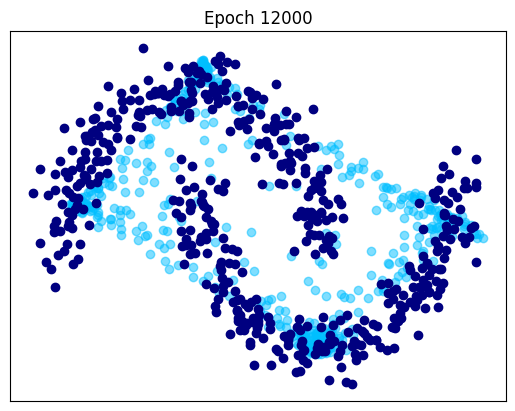

[12100/40000] 	Loss_G: -0.0005
[12200/40000] 	Loss_G: -0.0000
[12300/40000] 	Loss_G: -0.0008
[12400/40000] 	Loss_G: -0.0008
[12500/40000] 	Loss_G: 0.0001
[12600/40000] 	Loss_G: -0.0006
[12700/40000] 	Loss_G: -0.0006
[12800/40000] 	Loss_G: -0.0001
[12900/40000] 	Loss_G: -0.0008
[13000/40000] 	Loss_G: -0.0006
[13100/40000] 	Loss_G: -0.0008
[13200/40000] 	Loss_G: 0.0001
[13300/40000] 	Loss_G: 0.0025
[13400/40000] 	Loss_G: 0.0003
[13500/40000] 	Loss_G: -0.0001
[13600/40000] 	Loss_G: -0.0008
[13700/40000] 	Loss_G: 0.0005
[13800/40000] 	Loss_G: -0.0001
[13900/40000] 	Loss_G: -0.0004
[14000/40000] 	Loss_G: -0.0009


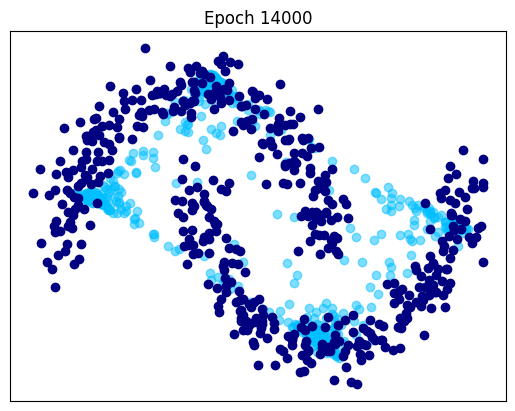

[14100/40000] 	Loss_G: -0.0006
[14200/40000] 	Loss_G: -0.0006
[14300/40000] 	Loss_G: 0.0042
[14400/40000] 	Loss_G: -0.0007
[14500/40000] 	Loss_G: -0.0009
[14600/40000] 	Loss_G: -0.0000
[14700/40000] 	Loss_G: -0.0005
[14800/40000] 	Loss_G: 0.0001
[14900/40000] 	Loss_G: 0.0004
[15000/40000] 	Loss_G: -0.0003
[15100/40000] 	Loss_G: -0.0009
[15200/40000] 	Loss_G: -0.0009
[15300/40000] 	Loss_G: -0.0000
[15400/40000] 	Loss_G: -0.0002
[15500/40000] 	Loss_G: -0.0004
[15600/40000] 	Loss_G: -0.0006
[15700/40000] 	Loss_G: -0.0008
[15800/40000] 	Loss_G: -0.0000
[15900/40000] 	Loss_G: -0.0006
[16000/40000] 	Loss_G: 0.0005


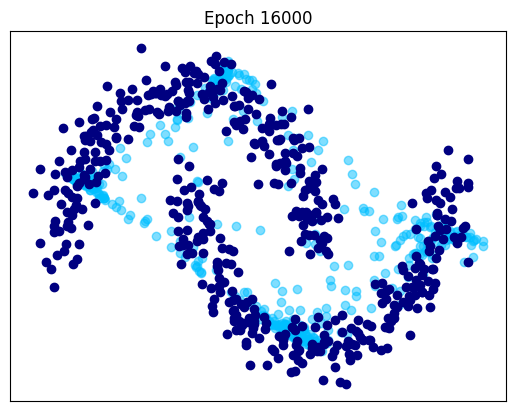

[16100/40000] 	Loss_G: -0.0008
[16200/40000] 	Loss_G: -0.0004
[16300/40000] 	Loss_G: -0.0005
[16400/40000] 	Loss_G: -0.0009
[16500/40000] 	Loss_G: -0.0008
[16600/40000] 	Loss_G: -0.0004
[16700/40000] 	Loss_G: -0.0006
[16800/40000] 	Loss_G: -0.0007
[16900/40000] 	Loss_G: 0.0015
[17000/40000] 	Loss_G: -0.0008
[17100/40000] 	Loss_G: 0.0020
[17200/40000] 	Loss_G: 0.0001
[17300/40000] 	Loss_G: -0.0007
[17400/40000] 	Loss_G: 0.0006
[17500/40000] 	Loss_G: -0.0008
[17600/40000] 	Loss_G: 0.0008
[17700/40000] 	Loss_G: -0.0008
[17800/40000] 	Loss_G: -0.0004
[17900/40000] 	Loss_G: 0.0000
[18000/40000] 	Loss_G: -0.0010


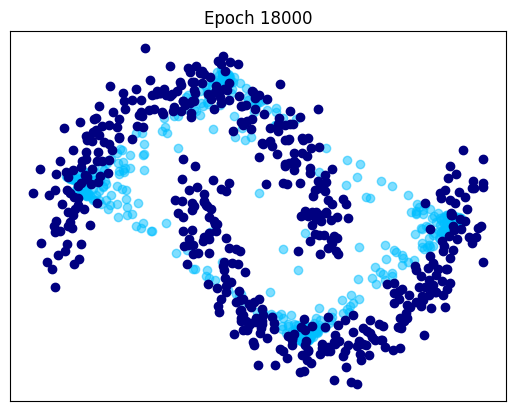

[18100/40000] 	Loss_G: -0.0001
[18200/40000] 	Loss_G: -0.0008
[18300/40000] 	Loss_G: 0.0007
[18400/40000] 	Loss_G: 0.0010
[18500/40000] 	Loss_G: 0.0000
[18600/40000] 	Loss_G: -0.0003
[18700/40000] 	Loss_G: -0.0008
[18800/40000] 	Loss_G: -0.0007
[18900/40000] 	Loss_G: -0.0004
[19000/40000] 	Loss_G: -0.0009
[19100/40000] 	Loss_G: -0.0009
[19200/40000] 	Loss_G: -0.0006
[19300/40000] 	Loss_G: -0.0001
[19400/40000] 	Loss_G: -0.0007
[19500/40000] 	Loss_G: 0.0010
[19600/40000] 	Loss_G: -0.0009
[19700/40000] 	Loss_G: -0.0006
[19800/40000] 	Loss_G: -0.0009
[19900/40000] 	Loss_G: -0.0006
[20000/40000] 	Loss_G: -0.0003


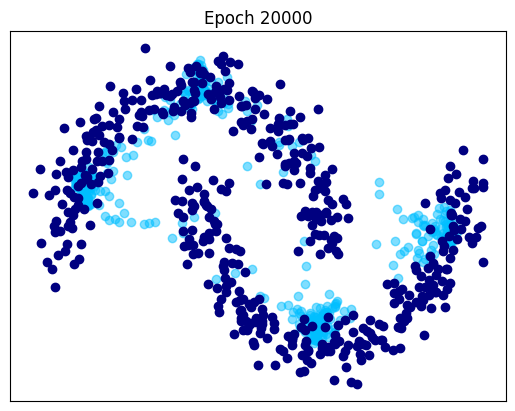

[20100/40000] 	Loss_G: -0.0007
[20200/40000] 	Loss_G: -0.0008
[20300/40000] 	Loss_G: 0.0012
[20400/40000] 	Loss_G: -0.0005
[20500/40000] 	Loss_G: -0.0009
[20600/40000] 	Loss_G: -0.0005
[20700/40000] 	Loss_G: 0.0012
[20800/40000] 	Loss_G: -0.0004
[20900/40000] 	Loss_G: -0.0001
[21000/40000] 	Loss_G: -0.0001
[21100/40000] 	Loss_G: -0.0007
[21200/40000] 	Loss_G: -0.0007
[21300/40000] 	Loss_G: 0.0006
[21400/40000] 	Loss_G: 0.0003
[21500/40000] 	Loss_G: -0.0009
[21600/40000] 	Loss_G: -0.0003
[21700/40000] 	Loss_G: -0.0007
[21800/40000] 	Loss_G: 0.0009
[21900/40000] 	Loss_G: -0.0009
[22000/40000] 	Loss_G: -0.0004


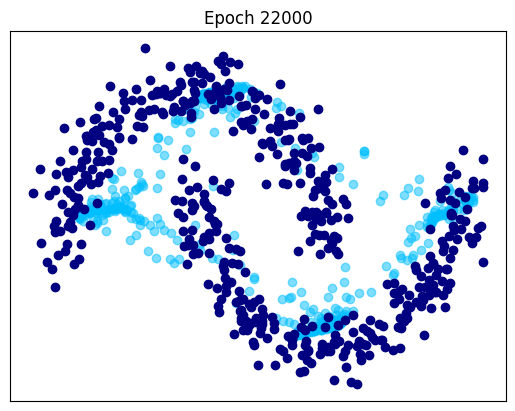

[22100/40000] 	Loss_G: -0.0009
[22200/40000] 	Loss_G: -0.0006
[22300/40000] 	Loss_G: -0.0007
[22400/40000] 	Loss_G: 0.0007
[22500/40000] 	Loss_G: 0.0047
[22600/40000] 	Loss_G: 0.0012
[22700/40000] 	Loss_G: 0.0007
[22800/40000] 	Loss_G: -0.0005
[22900/40000] 	Loss_G: -0.0006
[23000/40000] 	Loss_G: -0.0002
[23100/40000] 	Loss_G: -0.0001
[23200/40000] 	Loss_G: -0.0009
[23300/40000] 	Loss_G: -0.0006
[23400/40000] 	Loss_G: 0.0013
[23500/40000] 	Loss_G: -0.0009
[23600/40000] 	Loss_G: -0.0009
[23700/40000] 	Loss_G: -0.0005
[23800/40000] 	Loss_G: 0.0000
[23900/40000] 	Loss_G: 0.0036
[24000/40000] 	Loss_G: -0.0005


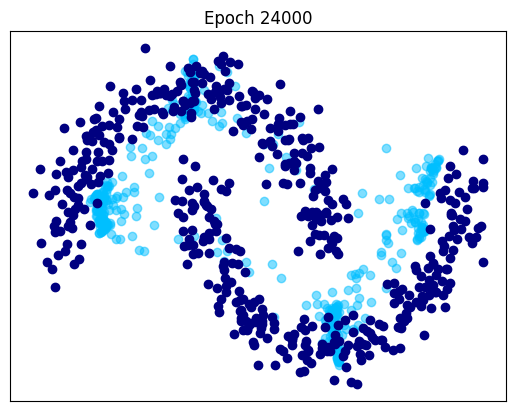

[24100/40000] 	Loss_G: -0.0008
[24200/40000] 	Loss_G: -0.0009
[24300/40000] 	Loss_G: -0.0002
[24400/40000] 	Loss_G: -0.0001
[24500/40000] 	Loss_G: -0.0002
[24600/40000] 	Loss_G: 0.0007
[24700/40000] 	Loss_G: -0.0005
[24800/40000] 	Loss_G: -0.0004
[24900/40000] 	Loss_G: -0.0009
[25000/40000] 	Loss_G: -0.0005
[25100/40000] 	Loss_G: 0.0008
[25200/40000] 	Loss_G: -0.0003
[25300/40000] 	Loss_G: -0.0001
[25400/40000] 	Loss_G: -0.0003
[25500/40000] 	Loss_G: -0.0007
[25600/40000] 	Loss_G: -0.0008
[25700/40000] 	Loss_G: -0.0002
[25800/40000] 	Loss_G: -0.0009
[25900/40000] 	Loss_G: -0.0007
[26000/40000] 	Loss_G: -0.0009


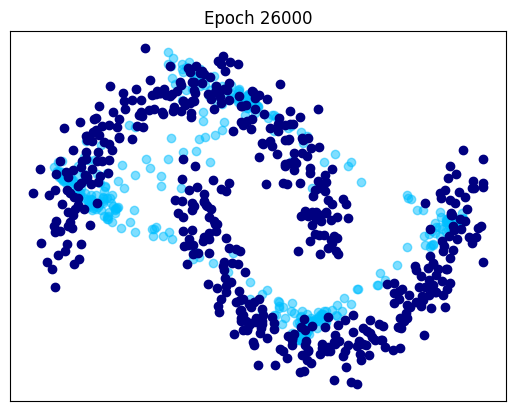

[26100/40000] 	Loss_G: 0.0010
[26200/40000] 	Loss_G: 0.0017
[26300/40000] 	Loss_G: -0.0005
[26400/40000] 	Loss_G: -0.0005
[26500/40000] 	Loss_G: -0.0003
[26600/40000] 	Loss_G: -0.0006
[26700/40000] 	Loss_G: -0.0008
[26800/40000] 	Loss_G: 0.0010
[26900/40000] 	Loss_G: -0.0006
[27000/40000] 	Loss_G: 0.0010
[27100/40000] 	Loss_G: -0.0004
[27200/40000] 	Loss_G: -0.0003
[27300/40000] 	Loss_G: -0.0005
[27400/40000] 	Loss_G: -0.0010
[27500/40000] 	Loss_G: -0.0004
[27600/40000] 	Loss_G: 0.0003
[27700/40000] 	Loss_G: -0.0007
[27800/40000] 	Loss_G: -0.0005
[27900/40000] 	Loss_G: -0.0008
[28000/40000] 	Loss_G: -0.0005


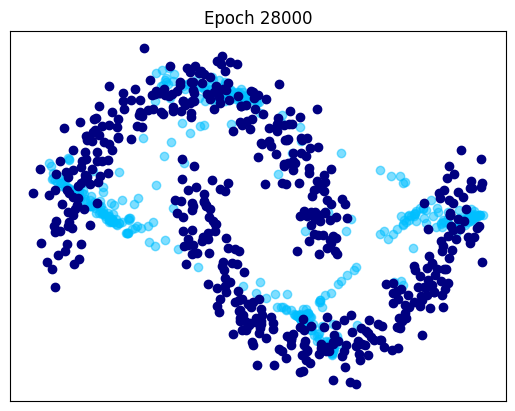

[28100/40000] 	Loss_G: -0.0008
[28200/40000] 	Loss_G: -0.0004
[28300/40000] 	Loss_G: -0.0006
[28400/40000] 	Loss_G: 0.0015
[28500/40000] 	Loss_G: -0.0005
[28600/40000] 	Loss_G: -0.0007
[28700/40000] 	Loss_G: -0.0004
[28800/40000] 	Loss_G: 0.0003
[28900/40000] 	Loss_G: -0.0002
[29000/40000] 	Loss_G: -0.0002
[29100/40000] 	Loss_G: -0.0006
[29200/40000] 	Loss_G: -0.0008
[29300/40000] 	Loss_G: -0.0009
[29400/40000] 	Loss_G: -0.0008
[29500/40000] 	Loss_G: -0.0007
[29600/40000] 	Loss_G: -0.0007
[29700/40000] 	Loss_G: -0.0005
[29800/40000] 	Loss_G: -0.0002
[29900/40000] 	Loss_G: -0.0009
[30000/40000] 	Loss_G: 0.0011


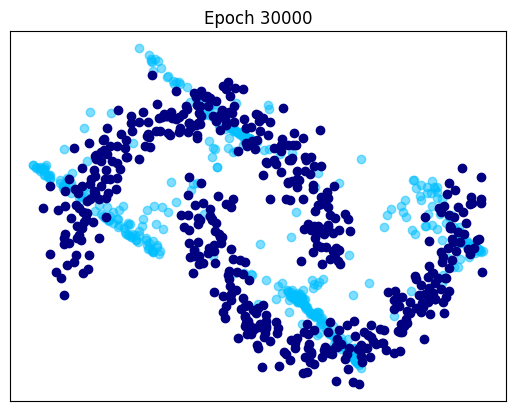

[30100/40000] 	Loss_G: -0.0003
[30200/40000] 	Loss_G: -0.0008
[30300/40000] 	Loss_G: -0.0005
[30400/40000] 	Loss_G: 0.0027
[30500/40000] 	Loss_G: 0.0007
[30600/40000] 	Loss_G: -0.0009
[30700/40000] 	Loss_G: -0.0008
[30800/40000] 	Loss_G: 0.0013
[30900/40000] 	Loss_G: -0.0010
[31000/40000] 	Loss_G: -0.0009
[31100/40000] 	Loss_G: 0.0008
[31200/40000] 	Loss_G: -0.0008
[31300/40000] 	Loss_G: -0.0001
[31400/40000] 	Loss_G: 0.0002
[31500/40000] 	Loss_G: -0.0009
[31600/40000] 	Loss_G: -0.0004
[31700/40000] 	Loss_G: -0.0007
[31800/40000] 	Loss_G: -0.0008
[31900/40000] 	Loss_G: -0.0001
[32000/40000] 	Loss_G: -0.0009


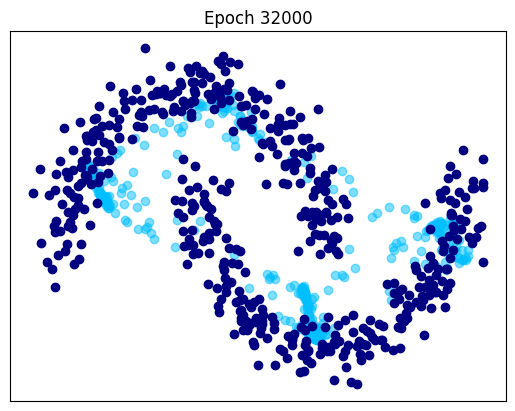

[32100/40000] 	Loss_G: -0.0007
[32200/40000] 	Loss_G: 0.0014
[32300/40000] 	Loss_G: -0.0008
[32400/40000] 	Loss_G: 0.0023
[32500/40000] 	Loss_G: -0.0005
[32600/40000] 	Loss_G: -0.0001
[32700/40000] 	Loss_G: -0.0002
[32800/40000] 	Loss_G: -0.0008
[32900/40000] 	Loss_G: -0.0009
[33000/40000] 	Loss_G: -0.0001
[33100/40000] 	Loss_G: 0.0003
[33200/40000] 	Loss_G: -0.0002
[33300/40000] 	Loss_G: -0.0005
[33400/40000] 	Loss_G: -0.0010
[33500/40000] 	Loss_G: -0.0004
[33600/40000] 	Loss_G: 0.0002
[33700/40000] 	Loss_G: -0.0003
[33800/40000] 	Loss_G: -0.0006
[33900/40000] 	Loss_G: 0.0015
[34000/40000] 	Loss_G: -0.0003


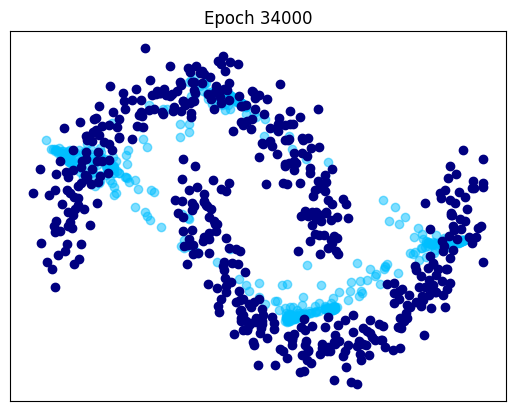

[34100/40000] 	Loss_G: -0.0008
[34200/40000] 	Loss_G: -0.0004
[34300/40000] 	Loss_G: 0.0013
[34400/40000] 	Loss_G: 0.0007
[34500/40000] 	Loss_G: -0.0005
[34600/40000] 	Loss_G: -0.0006
[34700/40000] 	Loss_G: -0.0010
[34800/40000] 	Loss_G: 0.0000
[34900/40000] 	Loss_G: -0.0006
[35000/40000] 	Loss_G: -0.0005
[35100/40000] 	Loss_G: 0.0001
[35200/40000] 	Loss_G: -0.0010
[35300/40000] 	Loss_G: -0.0002
[35400/40000] 	Loss_G: -0.0008
[35500/40000] 	Loss_G: 0.0005
[35600/40000] 	Loss_G: -0.0007
[35700/40000] 	Loss_G: -0.0001
[35800/40000] 	Loss_G: -0.0001
[35900/40000] 	Loss_G: -0.0006
[36000/40000] 	Loss_G: -0.0006


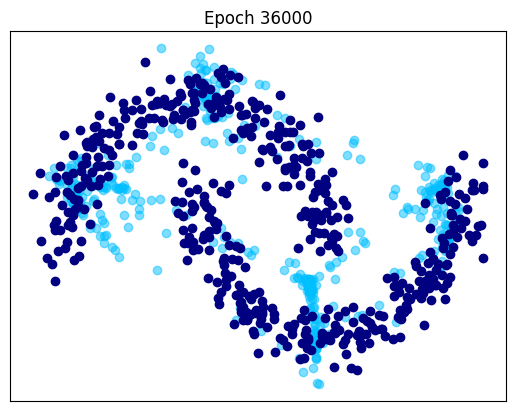

[36100/40000] 	Loss_G: -0.0007
[36200/40000] 	Loss_G: -0.0003
[36300/40000] 	Loss_G: -0.0002
[36400/40000] 	Loss_G: -0.0006
[36500/40000] 	Loss_G: -0.0004
[36600/40000] 	Loss_G: 0.0002
[36700/40000] 	Loss_G: -0.0004
[36800/40000] 	Loss_G: -0.0005
[36900/40000] 	Loss_G: -0.0002
[37000/40000] 	Loss_G: -0.0009
[37100/40000] 	Loss_G: -0.0003
[37200/40000] 	Loss_G: 0.0003
[37300/40000] 	Loss_G: -0.0008
[37400/40000] 	Loss_G: -0.0004
[37500/40000] 	Loss_G: 0.0016
[37600/40000] 	Loss_G: -0.0009
[37700/40000] 	Loss_G: -0.0001
[37800/40000] 	Loss_G: -0.0007
[37900/40000] 	Loss_G: -0.0008
[38000/40000] 	Loss_G: -0.0003


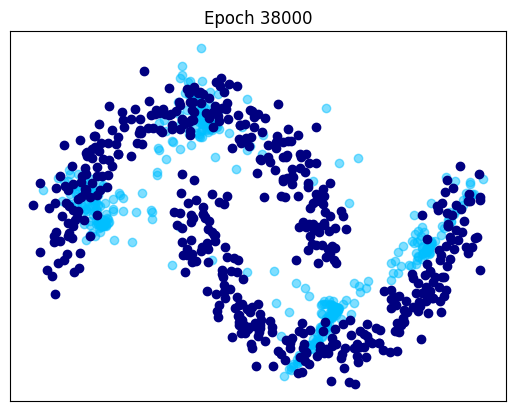

[38100/40000] 	Loss_G: -0.0005
[38200/40000] 	Loss_G: -0.0009
[38300/40000] 	Loss_G: -0.0007
[38400/40000] 	Loss_G: -0.0004
[38500/40000] 	Loss_G: -0.0004
[38600/40000] 	Loss_G: 0.0017
[38700/40000] 	Loss_G: -0.0005
[38800/40000] 	Loss_G: -0.0004
[38900/40000] 	Loss_G: -0.0006
[39000/40000] 	Loss_G: -0.0005
[39100/40000] 	Loss_G: -0.0004
[39200/40000] 	Loss_G: -0.0004
[39300/40000] 	Loss_G: 0.0004
[39400/40000] 	Loss_G: -0.0009
[39500/40000] 	Loss_G: -0.0003
[39600/40000] 	Loss_G: -0.0010
[39700/40000] 	Loss_G: 0.0013
[39800/40000] 	Loss_G: 0.0027
[39900/40000] 	Loss_G: -0.0005


In [16]:
# Main loop
torch.manual_seed(1)  # initialize random seed for reproducibility

# Initialize generators and discriminators
G = Generator_Moon(n_in=n_in, n_out=d, n_hid=10, nlayers=3, device=device)
kernel = _mix_rbf_kernel

optimG = optim.Adam(G.parameters(), lr=lr)

Glosses = []

for epoch in range(n_epochs):

    Gloss = torch.tensor(0.0, device=device)

    z = torch.randn(b, n_in, device=device)
    x = G(z)
    optimG.zero_grad()
    Gloss = mmd2(kernel, x, y)
    Gloss.backward()
    optimG.step()

    # Output training stats
    if (epoch % loss_display == 0):
        print('[%d/%d] \tLoss_G: %.4f'
          % (epoch, n_epochs, Gloss.item()))
        Glosses.append(Gloss.item())


    if(epoch % iter_display == 0):
        z = torch.randn(b, n_in, device=device)
        x = G(z)
        xd = x.detach()
        strtitle = 'Epoch '+str(epoch)
        fig = plt.figure(dpi=100)
        plt.xticks([])
        plt.yticks([])
        plt.scatter(xd[:, 0].cpu(), xd[:,1].cpu(),c='deepskyblue',alpha=.5)
        plt.scatter(y[:, 0].cpu(), y[:,1].cpu(),c='navy')
        plt.title(strtitle)
        plt.show()

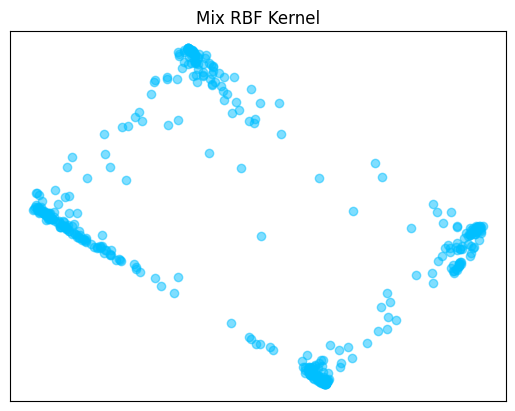

In [18]:
z = torch.randn(b, n_in, device=device)
x = G(z)
xd = x.detach()
strtitle = 'Epoch '+str(epoch)
fig = plt.figure(dpi=100)
plt.xticks([])
plt.yticks([])
plt.scatter(xd[:, 0].cpu(), xd[:,1].cpu(),c='deepskyblue',alpha=.5)
plt.title("Mix RBF Kernel")
plt.show()

[0/40000] 	Loss_G: 0.1565


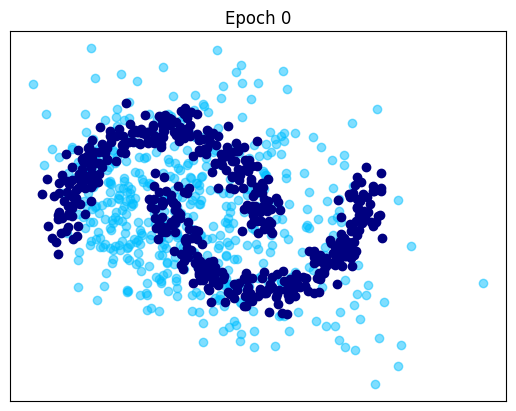

[100/40000] 	Loss_G: 0.0085
[200/40000] 	Loss_G: -0.0018
[300/40000] 	Loss_G: -0.0019
[400/40000] 	Loss_G: -0.0020
[500/40000] 	Loss_G: 0.0020
[600/40000] 	Loss_G: -0.0044
[700/40000] 	Loss_G: 0.0018
[800/40000] 	Loss_G: -0.0003
[900/40000] 	Loss_G: -0.0006
[1000/40000] 	Loss_G: -0.0041
[1100/40000] 	Loss_G: 0.0039
[1200/40000] 	Loss_G: -0.0038
[1300/40000] 	Loss_G: -0.0021
[1400/40000] 	Loss_G: -0.0040
[1500/40000] 	Loss_G: -0.0055
[1600/40000] 	Loss_G: -0.0014
[1700/40000] 	Loss_G: -0.0021
[1800/40000] 	Loss_G: -0.0015
[1900/40000] 	Loss_G: 0.0007
[2000/40000] 	Loss_G: -0.0044


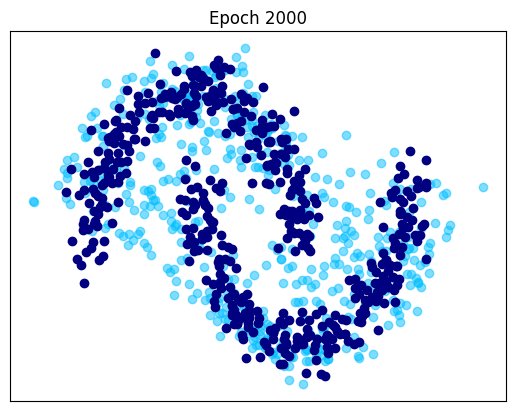

[2100/40000] 	Loss_G: -0.0054
[2200/40000] 	Loss_G: -0.0027
[2300/40000] 	Loss_G: -0.0019
[2400/40000] 	Loss_G: 0.0086
[2500/40000] 	Loss_G: -0.0026
[2600/40000] 	Loss_G: -0.0008
[2700/40000] 	Loss_G: -0.0035
[2800/40000] 	Loss_G: 0.0017
[2900/40000] 	Loss_G: 0.0000
[3000/40000] 	Loss_G: -0.0015
[3100/40000] 	Loss_G: 0.0098
[3200/40000] 	Loss_G: -0.0053
[3300/40000] 	Loss_G: 0.0071
[3400/40000] 	Loss_G: -0.0002
[3500/40000] 	Loss_G: -0.0057
[3600/40000] 	Loss_G: -0.0020
[3700/40000] 	Loss_G: -0.0054
[3800/40000] 	Loss_G: -0.0049
[3900/40000] 	Loss_G: -0.0022
[4000/40000] 	Loss_G: -0.0041


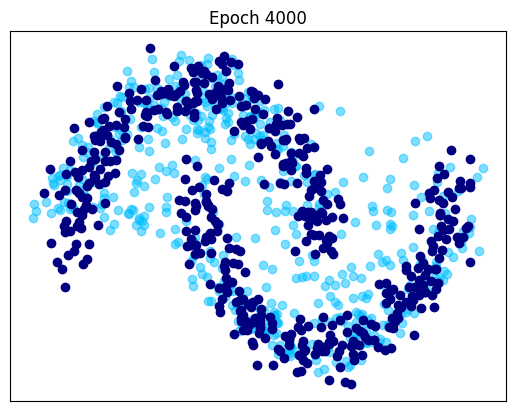

[4100/40000] 	Loss_G: -0.0020
[4200/40000] 	Loss_G: -0.0051
[4300/40000] 	Loss_G: -0.0049
[4400/40000] 	Loss_G: -0.0044
[4500/40000] 	Loss_G: -0.0053
[4600/40000] 	Loss_G: -0.0015
[4700/40000] 	Loss_G: 0.0112
[4800/40000] 	Loss_G: -0.0007
[4900/40000] 	Loss_G: 0.0014
[5000/40000] 	Loss_G: 0.0062
[5100/40000] 	Loss_G: -0.0045
[5200/40000] 	Loss_G: -0.0058
[5300/40000] 	Loss_G: -0.0044
[5400/40000] 	Loss_G: -0.0060
[5500/40000] 	Loss_G: -0.0058
[5600/40000] 	Loss_G: -0.0060
[5700/40000] 	Loss_G: -0.0067
[5800/40000] 	Loss_G: -0.0058
[5900/40000] 	Loss_G: -0.0031
[6000/40000] 	Loss_G: -0.0054


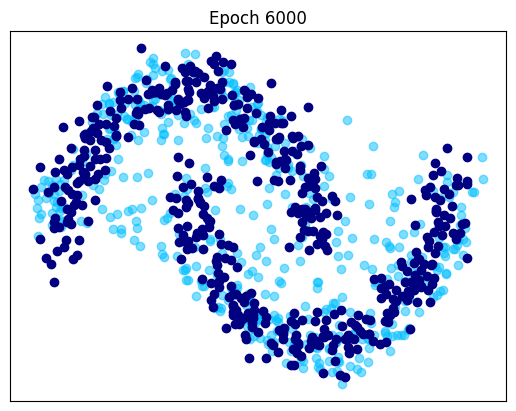

[6100/40000] 	Loss_G: -0.0003
[6200/40000] 	Loss_G: -0.0054
[6300/40000] 	Loss_G: 0.0065
[6400/40000] 	Loss_G: -0.0018
[6500/40000] 	Loss_G: -0.0040
[6600/40000] 	Loss_G: -0.0053
[6700/40000] 	Loss_G: -0.0055
[6800/40000] 	Loss_G: -0.0014
[6900/40000] 	Loss_G: 0.0073
[7000/40000] 	Loss_G: -0.0038
[7100/40000] 	Loss_G: -0.0046
[7200/40000] 	Loss_G: -0.0024
[7300/40000] 	Loss_G: 0.0030
[7400/40000] 	Loss_G: 0.0008
[7500/40000] 	Loss_G: 0.0038
[7600/40000] 	Loss_G: 0.0035
[7700/40000] 	Loss_G: -0.0018
[7800/40000] 	Loss_G: -0.0006
[7900/40000] 	Loss_G: -0.0048
[8000/40000] 	Loss_G: -0.0051


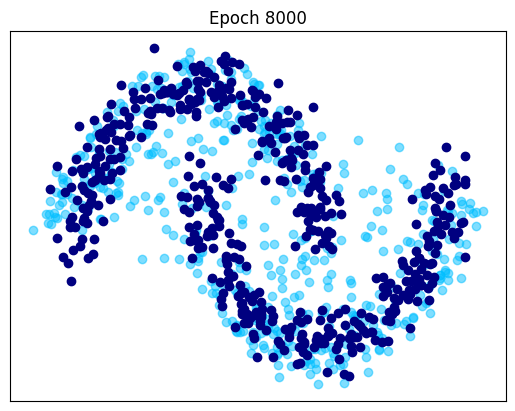

[8100/40000] 	Loss_G: -0.0008
[8200/40000] 	Loss_G: 0.0008
[8300/40000] 	Loss_G: -0.0032
[8400/40000] 	Loss_G: -0.0015
[8500/40000] 	Loss_G: -0.0018
[8600/40000] 	Loss_G: -0.0054
[8700/40000] 	Loss_G: -0.0070
[8800/40000] 	Loss_G: -0.0044
[8900/40000] 	Loss_G: 0.0044
[9000/40000] 	Loss_G: -0.0026
[9100/40000] 	Loss_G: -0.0049
[9200/40000] 	Loss_G: -0.0034
[9300/40000] 	Loss_G: -0.0044
[9400/40000] 	Loss_G: -0.0034
[9500/40000] 	Loss_G: -0.0024
[9600/40000] 	Loss_G: -0.0004
[9700/40000] 	Loss_G: -0.0003
[9800/40000] 	Loss_G: -0.0048
[9900/40000] 	Loss_G: -0.0032
[10000/40000] 	Loss_G: -0.0067


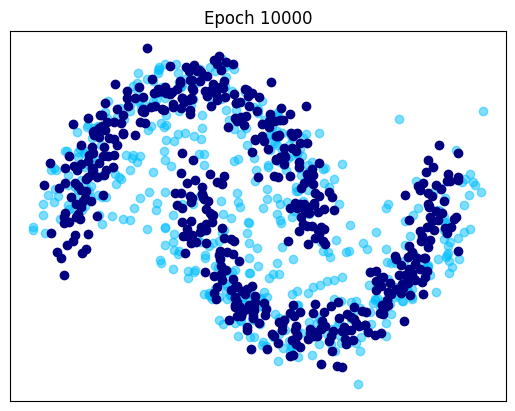

[10100/40000] 	Loss_G: -0.0018
[10200/40000] 	Loss_G: -0.0028
[10300/40000] 	Loss_G: -0.0053
[10400/40000] 	Loss_G: -0.0045
[10500/40000] 	Loss_G: -0.0042
[10600/40000] 	Loss_G: 0.0024
[10700/40000] 	Loss_G: -0.0046
[10800/40000] 	Loss_G: -0.0039
[10900/40000] 	Loss_G: -0.0067
[11000/40000] 	Loss_G: -0.0002
[11100/40000] 	Loss_G: 0.0021
[11200/40000] 	Loss_G: -0.0055
[11300/40000] 	Loss_G: -0.0027
[11400/40000] 	Loss_G: -0.0018
[11500/40000] 	Loss_G: -0.0056
[11600/40000] 	Loss_G: -0.0035
[11700/40000] 	Loss_G: -0.0061
[11800/40000] 	Loss_G: -0.0066
[11900/40000] 	Loss_G: -0.0071
[12000/40000] 	Loss_G: -0.0070


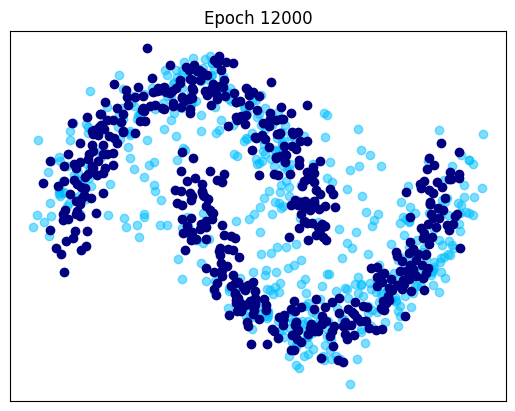

[12100/40000] 	Loss_G: -0.0029
[12200/40000] 	Loss_G: -0.0005
[12300/40000] 	Loss_G: -0.0041
[12400/40000] 	Loss_G: -0.0017
[12500/40000] 	Loss_G: -0.0043
[12600/40000] 	Loss_G: -0.0049
[12700/40000] 	Loss_G: 0.0035
[12800/40000] 	Loss_G: -0.0052
[12900/40000] 	Loss_G: -0.0044
[13000/40000] 	Loss_G: -0.0051
[13100/40000] 	Loss_G: 0.0020
[13200/40000] 	Loss_G: -0.0066
[13300/40000] 	Loss_G: 0.0018
[13400/40000] 	Loss_G: -0.0043
[13500/40000] 	Loss_G: -0.0044
[13600/40000] 	Loss_G: -0.0064
[13700/40000] 	Loss_G: -0.0067
[13800/40000] 	Loss_G: -0.0037
[13900/40000] 	Loss_G: -0.0061
[14000/40000] 	Loss_G: -0.0052


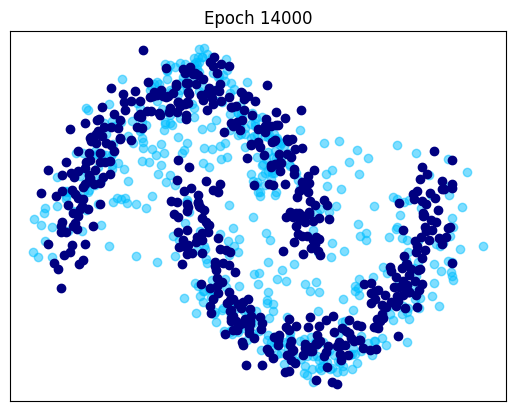

[14100/40000] 	Loss_G: 0.0053
[14200/40000] 	Loss_G: -0.0044
[14300/40000] 	Loss_G: -0.0036
[14400/40000] 	Loss_G: 0.0050
[14500/40000] 	Loss_G: -0.0057
[14600/40000] 	Loss_G: 0.0023
[14700/40000] 	Loss_G: -0.0053
[14800/40000] 	Loss_G: -0.0026
[14900/40000] 	Loss_G: 0.0019
[15000/40000] 	Loss_G: -0.0065
[15100/40000] 	Loss_G: -0.0052
[15200/40000] 	Loss_G: -0.0030
[15300/40000] 	Loss_G: -0.0054
[15400/40000] 	Loss_G: 0.0029
[15500/40000] 	Loss_G: -0.0018
[15600/40000] 	Loss_G: 0.0045
[15700/40000] 	Loss_G: -0.0063
[15800/40000] 	Loss_G: -0.0025
[15900/40000] 	Loss_G: -0.0065
[16000/40000] 	Loss_G: -0.0018


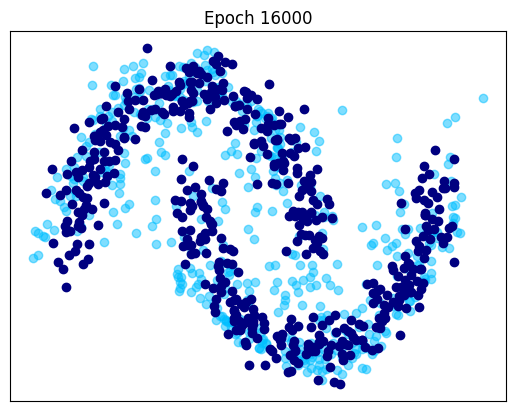

[16100/40000] 	Loss_G: -0.0057
[16200/40000] 	Loss_G: 0.0027
[16300/40000] 	Loss_G: -0.0054
[16400/40000] 	Loss_G: 0.0086
[16500/40000] 	Loss_G: -0.0038
[16600/40000] 	Loss_G: -0.0055
[16700/40000] 	Loss_G: -0.0048
[16800/40000] 	Loss_G: -0.0065
[16900/40000] 	Loss_G: -0.0030
[17000/40000] 	Loss_G: -0.0064
[17100/40000] 	Loss_G: -0.0056
[17200/40000] 	Loss_G: -0.0022
[17300/40000] 	Loss_G: -0.0024
[17400/40000] 	Loss_G: -0.0000
[17500/40000] 	Loss_G: 0.0050
[17600/40000] 	Loss_G: 0.0044
[17700/40000] 	Loss_G: 0.0047
[17800/40000] 	Loss_G: 0.0000
[17900/40000] 	Loss_G: -0.0040
[18000/40000] 	Loss_G: -0.0034


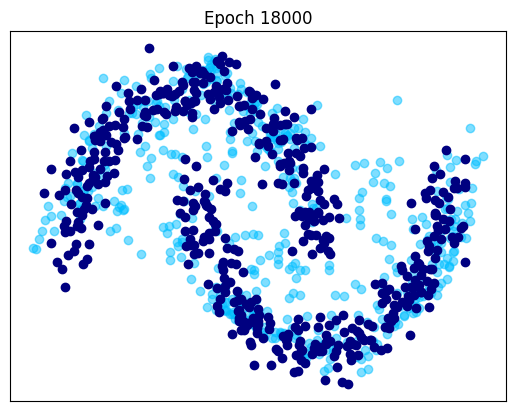

[18100/40000] 	Loss_G: 0.0010
[18200/40000] 	Loss_G: -0.0038
[18300/40000] 	Loss_G: -0.0051
[18400/40000] 	Loss_G: -0.0047
[18500/40000] 	Loss_G: -0.0032
[18600/40000] 	Loss_G: 0.0034
[18700/40000] 	Loss_G: 0.0033
[18800/40000] 	Loss_G: -0.0039
[18900/40000] 	Loss_G: -0.0025
[19000/40000] 	Loss_G: -0.0010
[19100/40000] 	Loss_G: -0.0065
[19200/40000] 	Loss_G: -0.0042
[19300/40000] 	Loss_G: -0.0043
[19400/40000] 	Loss_G: -0.0060
[19500/40000] 	Loss_G: -0.0044
[19600/40000] 	Loss_G: -0.0040
[19700/40000] 	Loss_G: 0.0007
[19800/40000] 	Loss_G: -0.0043
[19900/40000] 	Loss_G: -0.0063
[20000/40000] 	Loss_G: -0.0063


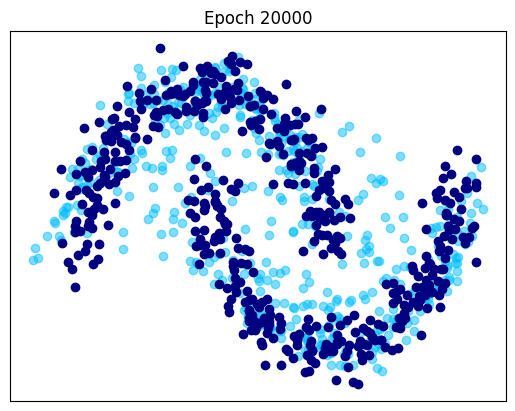

[20100/40000] 	Loss_G: -0.0005
[20200/40000] 	Loss_G: -0.0054
[20300/40000] 	Loss_G: -0.0069
[20400/40000] 	Loss_G: -0.0036
[20500/40000] 	Loss_G: -0.0031
[20600/40000] 	Loss_G: -0.0061
[20700/40000] 	Loss_G: 0.0078
[20800/40000] 	Loss_G: 0.0185
[20900/40000] 	Loss_G: -0.0038
[21000/40000] 	Loss_G: 0.0043
[21100/40000] 	Loss_G: -0.0063
[21200/40000] 	Loss_G: -0.0007
[21300/40000] 	Loss_G: 0.0072
[21400/40000] 	Loss_G: 0.0025
[21500/40000] 	Loss_G: -0.0065
[21600/40000] 	Loss_G: -0.0002
[21700/40000] 	Loss_G: -0.0058
[21800/40000] 	Loss_G: -0.0029
[21900/40000] 	Loss_G: -0.0057
[22000/40000] 	Loss_G: -0.0060


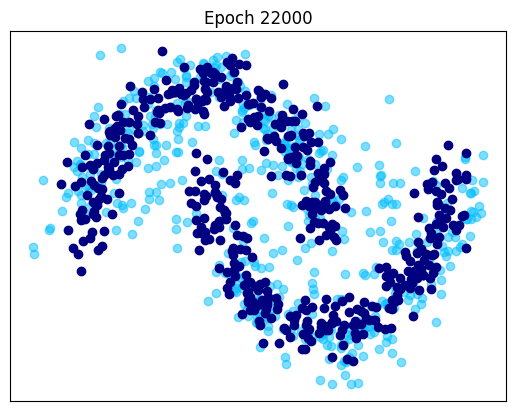

[22100/40000] 	Loss_G: -0.0028
[22200/40000] 	Loss_G: -0.0052
[22300/40000] 	Loss_G: -0.0061
[22400/40000] 	Loss_G: -0.0028
[22500/40000] 	Loss_G: -0.0043
[22600/40000] 	Loss_G: -0.0061
[22700/40000] 	Loss_G: -0.0044
[22800/40000] 	Loss_G: -0.0041
[22900/40000] 	Loss_G: 0.0073
[23000/40000] 	Loss_G: 0.0012
[23100/40000] 	Loss_G: -0.0049
[23200/40000] 	Loss_G: -0.0043
[23300/40000] 	Loss_G: -0.0057
[23400/40000] 	Loss_G: 0.0024
[23500/40000] 	Loss_G: -0.0032
[23600/40000] 	Loss_G: -0.0009
[23700/40000] 	Loss_G: -0.0030
[23800/40000] 	Loss_G: 0.0006
[23900/40000] 	Loss_G: -0.0054
[24000/40000] 	Loss_G: -0.0055


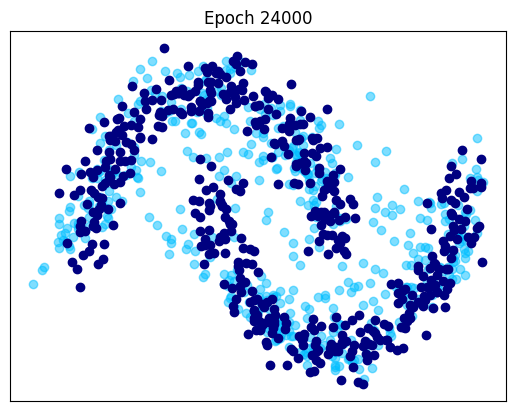

[24100/40000] 	Loss_G: -0.0045
[24200/40000] 	Loss_G: -0.0044
[24300/40000] 	Loss_G: -0.0051
[24400/40000] 	Loss_G: 0.0020
[24500/40000] 	Loss_G: -0.0051
[24600/40000] 	Loss_G: 0.0029
[24700/40000] 	Loss_G: -0.0061
[24800/40000] 	Loss_G: -0.0058
[24900/40000] 	Loss_G: 0.0101
[25000/40000] 	Loss_G: -0.0048
[25100/40000] 	Loss_G: -0.0041
[25200/40000] 	Loss_G: -0.0057
[25300/40000] 	Loss_G: -0.0066
[25400/40000] 	Loss_G: -0.0064
[25500/40000] 	Loss_G: 0.0013
[25600/40000] 	Loss_G: -0.0054
[25700/40000] 	Loss_G: -0.0047
[25800/40000] 	Loss_G: -0.0067
[25900/40000] 	Loss_G: 0.0046
[26000/40000] 	Loss_G: 0.0008


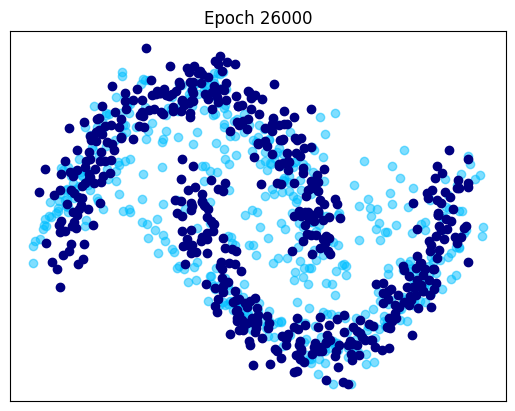

[26100/40000] 	Loss_G: -0.0011
[26200/40000] 	Loss_G: -0.0019
[26300/40000] 	Loss_G: -0.0011
[26400/40000] 	Loss_G: -0.0020
[26500/40000] 	Loss_G: 0.0017
[26600/40000] 	Loss_G: -0.0007
[26700/40000] 	Loss_G: -0.0033
[26800/40000] 	Loss_G: -0.0060
[26900/40000] 	Loss_G: -0.0012
[27000/40000] 	Loss_G: -0.0013
[27100/40000] 	Loss_G: -0.0048
[27200/40000] 	Loss_G: -0.0059
[27300/40000] 	Loss_G: 0.0079
[27400/40000] 	Loss_G: -0.0046
[27500/40000] 	Loss_G: 0.0061
[27600/40000] 	Loss_G: 0.0029
[27700/40000] 	Loss_G: 0.0073
[27800/40000] 	Loss_G: -0.0058
[27900/40000] 	Loss_G: -0.0024
[28000/40000] 	Loss_G: -0.0040


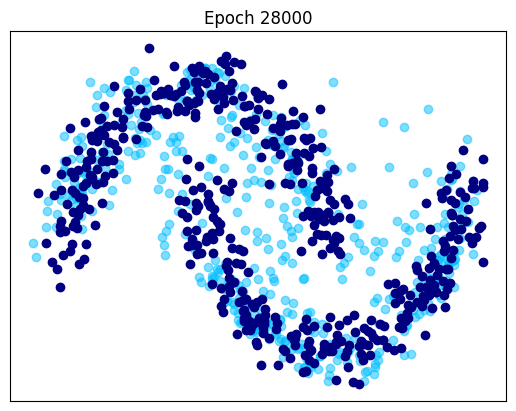

[28100/40000] 	Loss_G: -0.0038
[28200/40000] 	Loss_G: -0.0042
[28300/40000] 	Loss_G: -0.0013
[28400/40000] 	Loss_G: -0.0024
[28500/40000] 	Loss_G: 0.0026
[28600/40000] 	Loss_G: -0.0049
[28700/40000] 	Loss_G: -0.0053
[28800/40000] 	Loss_G: 0.0058
[28900/40000] 	Loss_G: -0.0053
[29000/40000] 	Loss_G: -0.0020
[29100/40000] 	Loss_G: -0.0071
[29200/40000] 	Loss_G: 0.0073
[29300/40000] 	Loss_G: -0.0032
[29400/40000] 	Loss_G: -0.0010
[29500/40000] 	Loss_G: -0.0009
[29600/40000] 	Loss_G: -0.0070
[29700/40000] 	Loss_G: -0.0009
[29800/40000] 	Loss_G: -0.0019
[29900/40000] 	Loss_G: -0.0042
[30000/40000] 	Loss_G: -0.0049


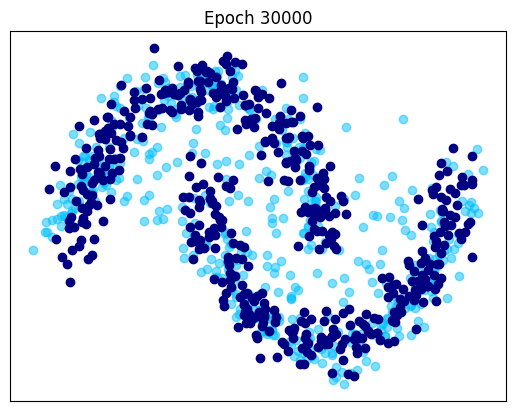

[30100/40000] 	Loss_G: 0.0019
[30200/40000] 	Loss_G: -0.0060
[30300/40000] 	Loss_G: -0.0018
[30400/40000] 	Loss_G: -0.0038
[30500/40000] 	Loss_G: -0.0050
[30600/40000] 	Loss_G: -0.0010
[30700/40000] 	Loss_G: -0.0025
[30800/40000] 	Loss_G: 0.0082
[30900/40000] 	Loss_G: -0.0029
[31000/40000] 	Loss_G: -0.0002
[31100/40000] 	Loss_G: -0.0069
[31200/40000] 	Loss_G: -0.0005
[31300/40000] 	Loss_G: -0.0001
[31400/40000] 	Loss_G: -0.0043
[31500/40000] 	Loss_G: -0.0006
[31600/40000] 	Loss_G: -0.0037
[31700/40000] 	Loss_G: -0.0017
[31800/40000] 	Loss_G: 0.0010
[31900/40000] 	Loss_G: -0.0058
[32000/40000] 	Loss_G: -0.0062


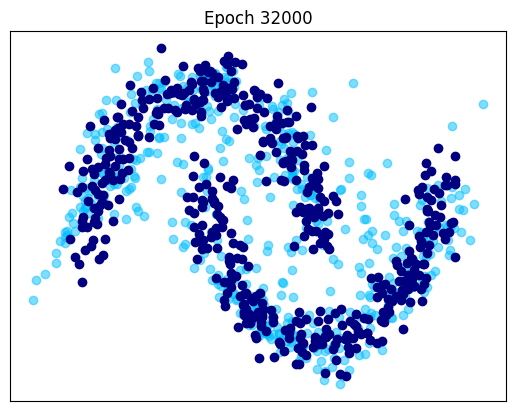

[32100/40000] 	Loss_G: -0.0012
[32200/40000] 	Loss_G: -0.0039
[32300/40000] 	Loss_G: -0.0060
[32400/40000] 	Loss_G: -0.0030
[32500/40000] 	Loss_G: -0.0017
[32600/40000] 	Loss_G: -0.0046
[32700/40000] 	Loss_G: -0.0054
[32800/40000] 	Loss_G: -0.0053
[32900/40000] 	Loss_G: -0.0062
[33000/40000] 	Loss_G: -0.0027
[33100/40000] 	Loss_G: -0.0032
[33200/40000] 	Loss_G: -0.0054
[33300/40000] 	Loss_G: -0.0013
[33400/40000] 	Loss_G: -0.0044
[33500/40000] 	Loss_G: -0.0056
[33600/40000] 	Loss_G: -0.0045
[33700/40000] 	Loss_G: 0.0031
[33800/40000] 	Loss_G: -0.0042
[33900/40000] 	Loss_G: -0.0030
[34000/40000] 	Loss_G: -0.0059


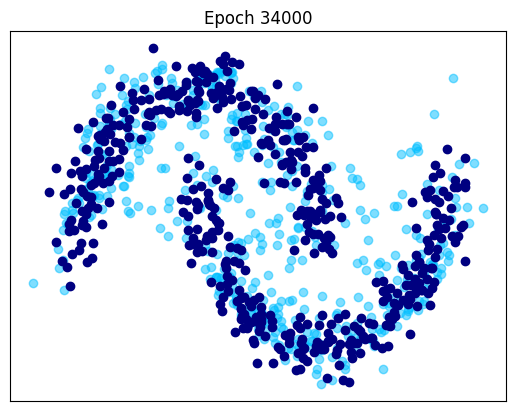

[34100/40000] 	Loss_G: -0.0043
[34200/40000] 	Loss_G: -0.0037
[34300/40000] 	Loss_G: -0.0059
[34400/40000] 	Loss_G: 0.0026
[34500/40000] 	Loss_G: -0.0052
[34600/40000] 	Loss_G: -0.0073
[34700/40000] 	Loss_G: -0.0069
[34800/40000] 	Loss_G: -0.0059
[34900/40000] 	Loss_G: -0.0041
[35000/40000] 	Loss_G: -0.0068
[35100/40000] 	Loss_G: -0.0001
[35200/40000] 	Loss_G: -0.0070
[35300/40000] 	Loss_G: -0.0026
[35400/40000] 	Loss_G: -0.0047
[35500/40000] 	Loss_G: -0.0004
[35600/40000] 	Loss_G: -0.0054
[35700/40000] 	Loss_G: -0.0054
[35800/40000] 	Loss_G: -0.0040
[35900/40000] 	Loss_G: -0.0055
[36000/40000] 	Loss_G: -0.0066


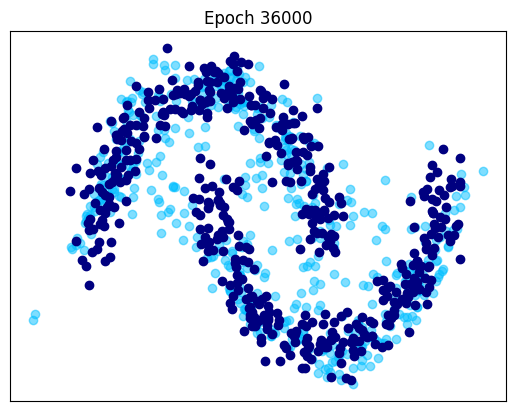

[36100/40000] 	Loss_G: -0.0055
[36200/40000] 	Loss_G: -0.0065
[36300/40000] 	Loss_G: -0.0054
[36400/40000] 	Loss_G: -0.0052
[36500/40000] 	Loss_G: -0.0064
[36600/40000] 	Loss_G: -0.0071
[36700/40000] 	Loss_G: -0.0015
[36800/40000] 	Loss_G: 0.0015
[36900/40000] 	Loss_G: -0.0036
[37000/40000] 	Loss_G: -0.0033
[37100/40000] 	Loss_G: -0.0059
[37200/40000] 	Loss_G: -0.0054
[37300/40000] 	Loss_G: 0.0007
[37400/40000] 	Loss_G: -0.0065
[37500/40000] 	Loss_G: -0.0010
[37600/40000] 	Loss_G: -0.0063
[37700/40000] 	Loss_G: -0.0030
[37800/40000] 	Loss_G: -0.0067
[37900/40000] 	Loss_G: 0.0008
[38000/40000] 	Loss_G: 0.0070


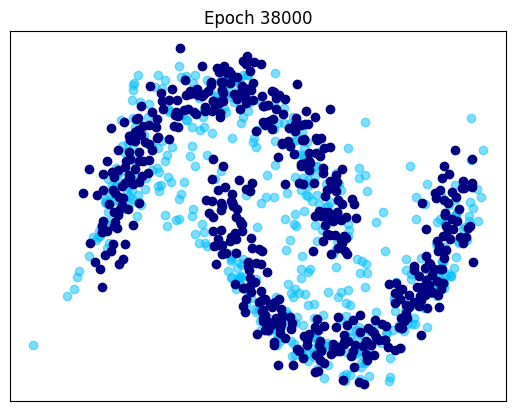

[38100/40000] 	Loss_G: -0.0019
[38200/40000] 	Loss_G: -0.0037
[38300/40000] 	Loss_G: 0.0027
[38400/40000] 	Loss_G: -0.0021
[38500/40000] 	Loss_G: 0.0061
[38600/40000] 	Loss_G: 0.0065
[38700/40000] 	Loss_G: 0.0038
[38800/40000] 	Loss_G: -0.0072
[38900/40000] 	Loss_G: -0.0034
[39000/40000] 	Loss_G: -0.0043
[39100/40000] 	Loss_G: -0.0050
[39200/40000] 	Loss_G: -0.0041
[39300/40000] 	Loss_G: 0.0015
[39400/40000] 	Loss_G: -0.0018
[39500/40000] 	Loss_G: -0.0059
[39600/40000] 	Loss_G: -0.0050
[39700/40000] 	Loss_G: -0.0046
[39800/40000] 	Loss_G: -0.0007
[39900/40000] 	Loss_G: -0.0015


In [4]:
# Main loop
torch.manual_seed(1)  # initialize random seed for reproducibility

# Initialize generators and discriminators
G = Generator_Moon(n_in=n_in, n_out=d, n_hid=10, nlayers=3, device=device)
kernel = _mix_rq_kernel

optimG = optim.Adam(G.parameters(), lr=lr)

Glosses = []

for epoch in range(n_epochs):

    Gloss = torch.tensor(0.0, device=device)

    z = torch.randn(b, n_in, device=device)
    x = G(z)
    optimG.zero_grad()
    Gloss = mmd2(kernel, x, y)
    Gloss.backward()
    optimG.step()

    # Output training stats
    if (epoch % loss_display == 0):
        print('[%d/%d] \tLoss_G: %.4f'
          % (epoch, n_epochs, Gloss.item()))
        Glosses.append(Gloss.item())


    if(epoch % iter_display == 0):
        z = torch.randn(b, n_in, device=device)
        x = G(z)
        xd = x.detach()
        strtitle = 'Epoch '+str(epoch)
        fig = plt.figure(dpi=100)
        plt.xticks([])
        plt.yticks([])
        plt.scatter(xd[:, 0].cpu(), xd[:,1].cpu(),c='deepskyblue',alpha=.5)
        plt.scatter(y[:, 0].cpu(), y[:,1].cpu(),c='navy')
        plt.title(strtitle)
        plt.show()

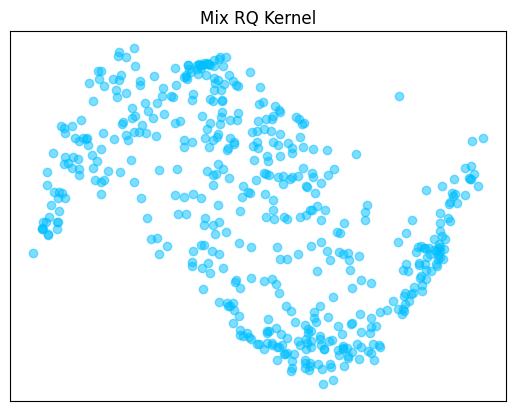

In [6]:
z = torch.randn(b, n_in, device=device)
x = G(z)
xd = x.detach()
strtitle = 'Epoch '+str(epoch)
fig = plt.figure(dpi=100)
plt.xticks([])
plt.yticks([])
plt.scatter(xd[:, 0].cpu(), xd[:,1].cpu(),c='deepskyblue',alpha=.5)
plt.title("Mix RQ Kernel")
plt.show()